# **Project Name - Bike Sharing Demand Prediction (Regression)**

# Project Summary -

The objective of this project is to improve public mobility and convenience through bike-sharing programs in urban areas. A key challenge in these programs is ensuring a consistent supply of bikes for rental. Bike-sharing systems offer automated rental and return services, allowing individuals to access and return bicycles at various locations. This project focuses on leveraging historical data, including factors such as temperature and time, to predict the demand for bike-sharing services in Seoul.


**Key Project Milestones**:

---

    1. **Data Preparation**:

-   The dataset consisted of approximately 8,760 records and 14 attributes.
-   Initial steps involved importing the dataset and necessary libraries, followed by conducting exploratory data analysis (EDA).
-   Outliers and missing values were identified and addressed, and data transformations were applied to ensure compatibility with machine learning models.
-   To handle target class imbalance, square root normalization was applied to the data.

    2. **Model Building and Evaluation**:

-   The cleaned and scaled data was used to train 11 different machine learning models.
-   Multiple metrics were used to evaluate model performance, providing a comprehensive view of their capabilities.
-   Particular emphasis was placed on the R2 score (coefficient of determination) and RMSE score (Root Mean Square Error).
-   The R2 score is a scale-independent metric, allowing for direct model performance comparison across different target variables and units of measurement.

This project seeks to address the practical challenge of predicting bike-sharing demand in urban environments, enhancing public access to sustainable transportation options. Through the application of machine learning and comprehensive model evaluation, it aims to provide insights and solutions that can benefit both service providers and the public.

# **Problem Statement**

In metropolitan areas, bike-sharing programs have become a key feature, enhancing public mobility and convenience. However, maintaining a consistent supply of rental bikes is a critical challenge. These bike-sharing systems, automated and efficient, allow people to rent and return bikes at multiple locations. This project is centered on leveraging historical data, encompassing factors like temperature and time, to forecast the demand for Seoul's bike-sharing program.

The offering of bike rentals in many metropolitan areas is designed to improve the accessibility and convenience of transportation. It is vital to ensure timely access to rental bikes, reducing waiting times for the public. The consistent supply of rental bikes is a primary concern, with the expected hourly bicycle count being of paramount importance.

These bike-sharing systems bring automation to membership, rentals, and bike returns, all facilitated through an extensive network of locations. Individuals have the flexibility to rent bikes from one location and return them to either the same spot or another, providing a versatile and efficient mode of transportation. The entire process is overseen by an interconnected network of automated stores, ensuring seamless operations.

The dataset's purpose is to predict the demand for Seoul's Bike Sharing Program, leveraging historical patterns, including factors like temperature, time, and various other data points. This predictive model aims to optimize bike supply and meet the dynamic needs of the city's residents.

##Business Objective

Predicting the optimal number of bikes needed at any specific moment and day is a crucial and intricate business challenge. Striking the right balance is of paramount importance: too few bikes can lead to resource inefficiencies, including maintenance costs and the need for parking and security infrastructure, while an excess of bikes can result in financial losses. These losses encompass immediate revenue reduction due to a limited customer base and potential long-term impacts, such as the erosion of customer trust and loyalty.

Hence, it is imperative for bike rental enterprises to possess a robust demand estimation mechanism. This mechanism equips them to operate efficiently, maximize resource utilization, and ensure a seamless experience for their customers. Accurate demand forecasts are essential for informed decision-making and the overall success of bike-sharing businesses.

# General Guidelines : -

Well-structured, formatted, and commented code is required.

Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
Each and every logic should have proper comments.

You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

# Chart visualization code
Why did you pick the specific chart?
What is/are the insight(s) found from the chart?
Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
You have to create at least 15 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.
Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Cross- Validation & Hyperparameter Tuning

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

##**1. Know your data**

## Import Libraries

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

# To import datetime library
from datetime import datetime
import datetime as dt

# libraries used to pre-process
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

# libraries used to implement models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# libraries to evaluate performance
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# to set max column display
pd.pandas.set_option('display.max_columns',None)

##Dataset Loading

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [ ]:
# Load Dataset
bike_df = pd.read_csv("SeoulBikeData.csv", encoding='latin1')

##Dataset First View

In [ ]:
# Viewing the top 5 rows to take a glimpse of the data
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

##Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

In [ ]:
num_rows = bike_df.shape[0]
num_columns = bike_df.shape[1]

print(f'The dataset contains \nNumber of rows : {num_rows} \nNumber of columns :{num_columns}')

The dataset contains 
Number of rows : 8760 
Number of columns :14


##Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Dataset consists of 14 columns, with the majority containing numerical data, except for 'Seasons,' 'Holiday,' 'Functioning Days,' and 'Date.'

The objective is to transform the 'Date' column into the DateTime data type.

##Duplicate Values

Removing duplicate records from your data is crucial. Duplicate instances, which result from errors or data collection issues, can be problematic. They waste resources and can skew the results of data analysis or machine learning models.

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = len(bike_df[bike_df.duplicated()])
print("The count of duplicates in the dataset is:", duplicate_count)

The count of duplicates in the dataset is: 0


In the given data, no duplicate entries were discovered.

##Missing Values/Null Values

Dealing with missing values is crucial because real-world data frequently has gaps, often due to errors or other factors. Since many machine-learning algorithms can't work with missing values, addressing them is a vital part of dataset preparation. It all starts with identifying those missing data points.

In [ ]:
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


<Axes: >

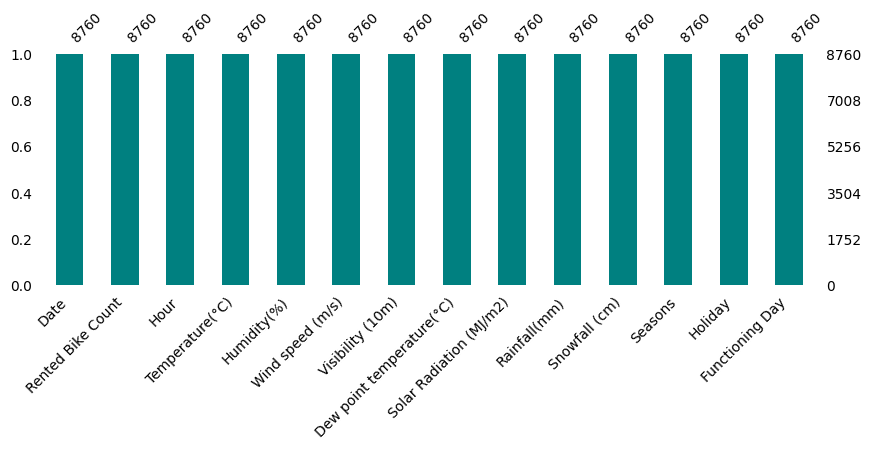

In [ ]:
# Create a bar chart to visualize missing values
msno.bar(bike_df, color='teal', sort='ascending', figsize=(10, 3), fontsize=10)

##What did you know about your dataset?

Answer Here:

*   The dataset, comprising 14 columns and 8760 rows, is clean with no missing or duplicate values.
*   The objective is to forecast bike-sharing demand using this dataset, sourced from the bike-sharing services market.
*   Demand prediction entails analyzing the likelihood of customers utilizing bike-sharing services, with the goal of effectively balancing supply and demand throughout the day.



##2. Understanding Your Variables

In [ ]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
bike_df.describe(include='all').T  # .T is a transpose

count unique         top  freq         mean  \
Date                         8760    365  30/11/2018    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

##Variables Description

The dataset includes information on weather conditions (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour, and date-related details.

Attribute Information:


*   Date: Given in the format year-month-day.
*   Rented Bike count: Reflects the count of bikes rented for each hour.
*   Hour: Indicates the hour of the day.
*   Temperature: Measured in Celsius.
*   Humidity: Represented as a percentage.
*   Windspeed: Measured in meters per second.
*   Visibility: Measured in meters.
*   Dew point temperature: In Celsius.
*   Solar radiation: Measured in MJ/m2 (MegaJoules per square meter).
*   Rainfall: Measured in millimeters.
*   Snowfall: Measured in centimeters.
*   Seasons: Categorized as Winter, Spring, Summer, or Autumn.
*   Holiday: Classifies whether it's a holiday or a regular day.
*   Functional Day: Distinguishes between Functional Hours and Non-Functional Hours.

##Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_value_counts = [(col, bike_df[col].nunique()) for col in bike_df.columns]
unique_counts_df = pd.DataFrame(unique_value_counts, columns=['Column', 'Unique Values'])
print(unique_counts_df)

                       Column  Unique Values
0                        Date            365
1           Rented Bike Count           2166
2                        Hour             24
3             Temperature(°C)            546
4                 Humidity(%)             90
5            Wind speed (m/s)             65
6            Visibility (10m)           1789
7   Dew point temperature(°C)            556
8     Solar Radiation (MJ/m2)            345
9                Rainfall(mm)             61
10              Snowfall (cm)             51
11                    Seasons              4
12                    Holiday              2
13            Functioning Day              2


##Observations:
*   Our analysis centers on critical dataset columns: 'Hour,' 'Holiday,' 'Functioning Day,' 'Rented Bike Count,' 'Temperature(°C),' and 'Seasons' due to their valuable insights.
*   Utilizing these attributes, we intend to build a regression model employing various regression algorithms.
*   The 'Hour' column poses an interesting case, as it can be treated both as a categorical and a numerical feature, and we'll explore the impact of these approaches.

##3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

##Exploratory Data Analysis (EDA)

*   Exploratory Data Analysis (EDA) is a vital phase in data science, focusing on comprehending the dataset.
*   EDA's core purpose is to reveal data insights, spot patterns, and recognize relationships and trends within the data.
*   This iterative process plays a key role in pinpointing outliers, handling missing values, and addressing potential issues that could influence data analysis and modeling.

##3.1 Creating Some New Features

In [ ]:
# All columns
bike_df.columns.tolist()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [ ]:
# Define the column name mapping dictionary
column_name_mapping = {
    'Rented Bike Count': 'rented_bike_count',
    'Date': 'date',
    'Hour': 'hour',
    'Seasons': 'seasons',
    'Holiday': 'holiday',
    'Temperature(°C)': 'temperature',
    'Humidity(%)': 'humidity',
    'Wind speed (m/s)': 'wind_speed',
    'Visibility (10m)': 'visibility',
    'Dew point temperature(°C)': 'dew_point_temperature',
    'Solar Radiation (MJ/m2)': 'solar_radiation',
    'Rainfall(mm)': 'rainfall',
    'Snowfall (cm)': 'snowfall',
    'Functioning Day': 'functioning_day'
}

# Rename the columns
bike_df.rename(columns=column_name_mapping, inplace=True)


##Breaking down date column

In [ ]:
import pandas as pd

# Convert 'date' column to datetime
bike_df['date'] = pd.to_datetime(bike_df['date'], dayfirst=True)

# Extract year, month, day, and weekday
bike_df['year'] = bike_df['date'].dt.year
bike_df['month'] = bike_df['date'].dt.month
bike_df['day'] = bike_df['date'].dt.day
bike_df['weekday'] = bike_df['date'].dt.day_name()

# Drop the original 'date' column
bike_df.drop('date', axis=1, inplace=True)

In [ ]:
unique_hours = set(bike_df['hour'])
print(unique_hours)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


The hours of the day display a distinct sequential order, where 9 am lies closer to 10 am than to 8 am, and is more distant from 6 pm. This feature is best classified as a discrete ordinal variable. To investigate potential influences, we'll consider hours both categorically and numerically, aiming to discern any resulting variations in the outcomes.

*   Daytime hours form a clear sequence.
*   9 am is closer to 10 am than 8 am, and farther from 6 pm.
*   It's a discrete ordinal variable.
*   We'll experiment by treating hours categorically and numerically.
*   The goal is to evaluate the impact of this transformation on the results.

In [ ]:
def session(x):

    '''
    For exploratory data analysis (EDA) purposes, the "Hour" column can be converted into categorical variables
    such as "Morning", "Noon", and "Night", without altering the existing label encoding format of the "Hour" column.
    This conversion is not necessary for model training.
    '''

    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

#apply funtion to make new category column
bike_df['session'] = bike_df['hour'].apply(session)

##3.2 Column: rented_bike_countt

In [ ]:
print(f'Min Count: {bike_df.rented_bike_count.min()}')
print(f'Max Count: {bike_df.rented_bike_count.max()}')

Min Count: 0
Max Count: 3556


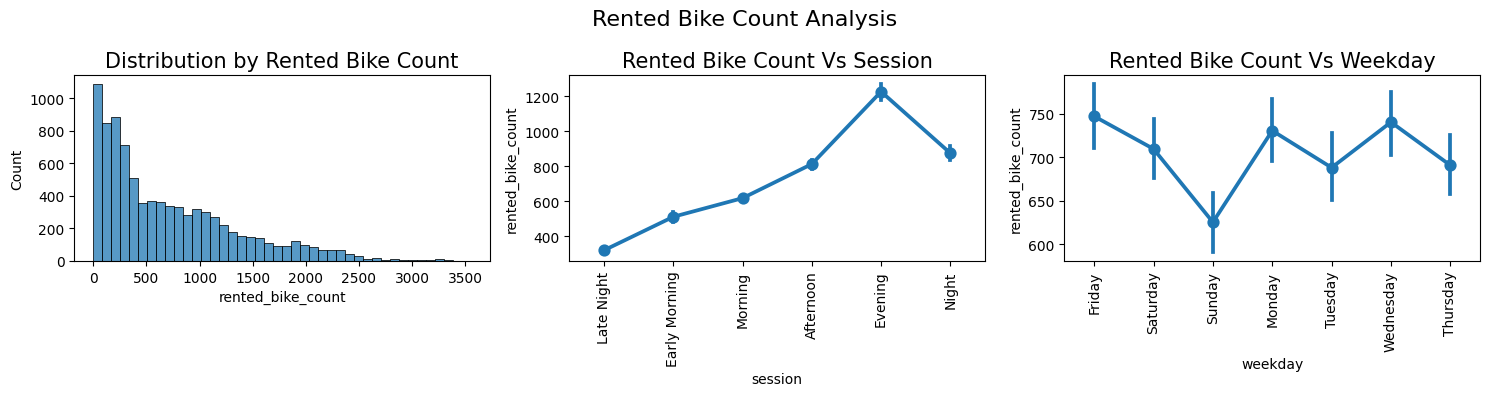

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Rented Bike Count Analysis', fontsize=16)

# Distribution analysis: Rented Bike Count
sns.histplot(bike_df['rented_bike_count'], ax=axes[0])
axes[0].set_title('Distribution by Rented Bike Count', size=15)

# Bivariate analysis: Rented Bike Count Vs Session
sns.pointplot(data=bike_df, x='session', y='rented_bike_count', ax=axes[1])
axes[1].set_title('Rented Bike Count Vs Session', size=15)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  # Provide labels to set_xticklabels

# Bivariate analysis: Rented Bike Count Vs Weekday
sns.pointplot(data=bike_df, x='weekday', y='rented_bike_count', ax=axes[2])
axes[2].set_title('Rented Bike Count Vs Weekday', size=15)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)  # Provide labels to set_xticklabels

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Key Insights:

*   The distribution of Rented Bike Count is positively skewed, featuring numerous outliers that require attention in subsequent steps.
*   Rental bike demand experiences a notable upswing during the evening hours, indicating a peak period.
*   Sundays consistently record the lowest demand for rented bikes, signaling a day of reduced activity.

##3.3 Column: 'hour'

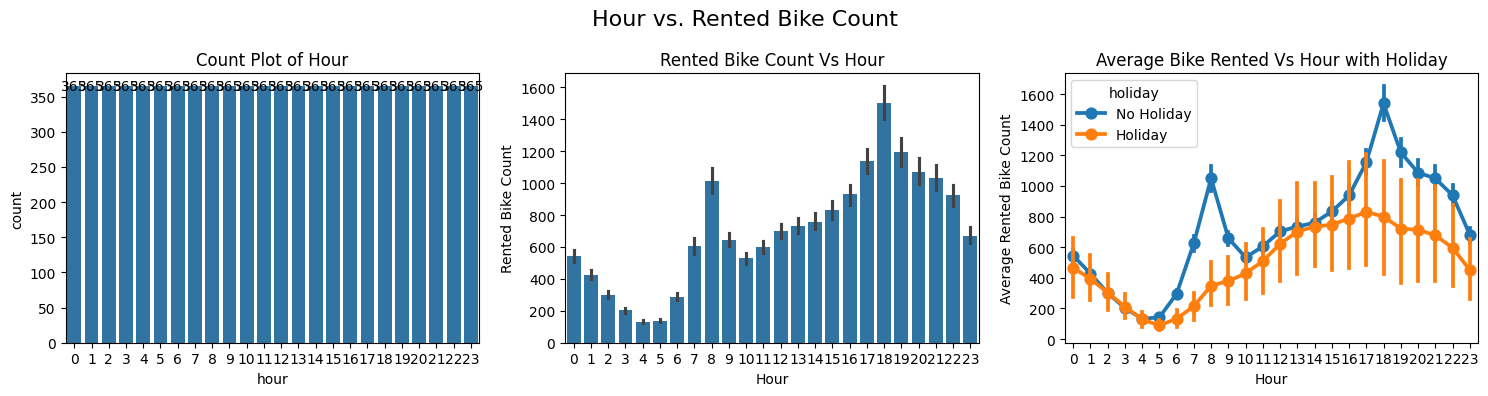

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Hour vs. Rented Bike Count', fontsize=16)

# Univariate analysis: Count Plot of Hour
count = sns.countplot(data=bike_df, x='hour', ax=axes[0])
count.set_title('Count Plot of Hour')

# Add value counts on top of the bars
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Bivariate analysis: Rented Bike Count Vs Hour
bar = sns.barplot(data=bike_df, x='hour', y='rented_bike_count', ax=axes[1])
bar.set(xlabel='Hour', ylabel='Rented Bike Count', title='Rented Bike Count Vs Hour')

# Multivariate analysis: Average Bike Rented Vs Hour with Holiday
point = sns.pointplot(data=bike_df, x='hour', y='rented_bike_count', hue='holiday', ax=axes[2])
point.set(xlabel='Hour', ylabel='Average Rented Bike Count', title='Average Bike Rented Vs Hour with Holiday')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Key Insights:

*   The dataset shows an even distribution of bike counts for every hour.
*   Peak demand for rented bikes occurs at 8 AM and 6 PM, indicating a surge during typical business hours.
*   Rented Bike Count reveals two distinct patterns, one for holidays and the other for non-holidays.
    *   Holidays: Peak rental times are around 8 AM and 6 PM, likely reflecting local commuters on workdays (Monday to Friday).
    *   Non-Working Days: A different pattern emerges, with fairly consistent rentals throughout the day and a peak around noon, likely representing tourists exploring the city on weekends (Saturday and Sunday).

##3.4 Column: 'temperature'

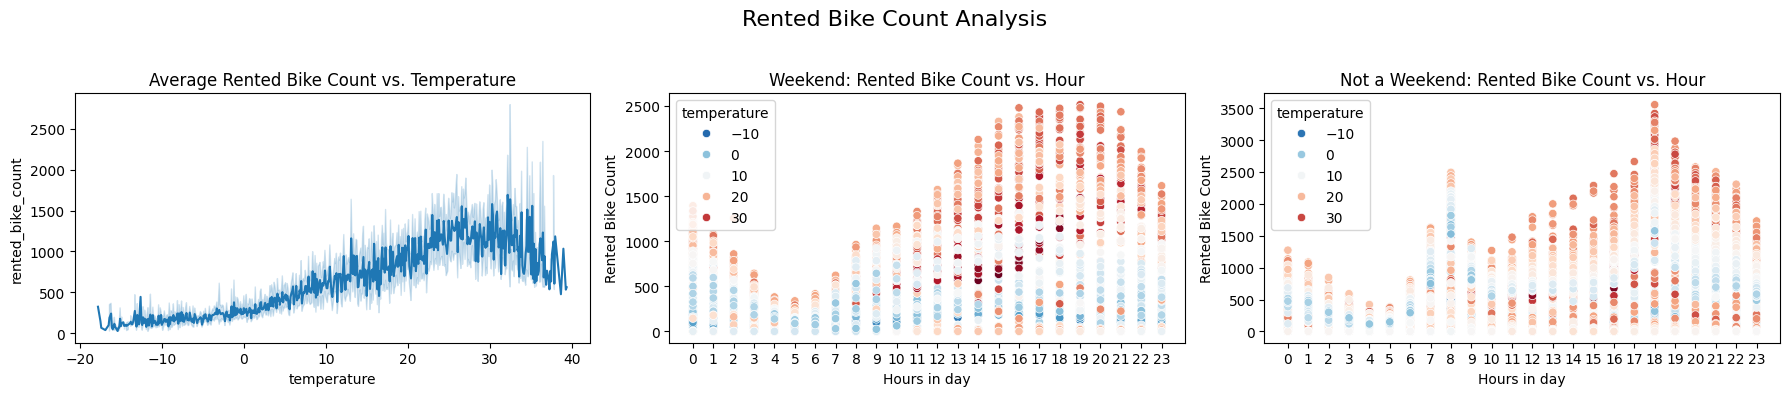

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
fig.suptitle('Rented Bike Count Analysis', fontsize=16)

# Univariate analysis: Average Rented Bike Count vs. Temperature
sns.lineplot(data=bike_df, x='temperature', y='rented_bike_count', ax=axes[0])
axes[0].set_title('Average Rented Bike Count vs. Temperature')

# Bivariate analysis: Weekend data
bike_df_weekend = bike_df[bike_df['weekday'].isin(['Saturday', 'Sunday'])]
sns.scatterplot(data=bike_df_weekend, x='hour', y='rented_bike_count',
                hue='temperature', palette='RdBu_r', ax=axes[1])
axes[1].set(xticks=range(24), xlabel='Hours in day', ylabel='Rented Bike Count')
axes[1].set_title('Weekend: Rented Bike Count vs. Hour')

# Bivariate analysis: Not a Weekend
bike_df_nw = bike_df[~bike_df['weekday'].isin(['Saturday', 'Sunday'])]
sns.scatterplot(data=bike_df_nw, x='hour', y='rented_bike_count',
                hue='temperature', palette='RdBu_r', ax=axes[2])
axes[2].set(xticks=range(24), xlabel='Hours in day', ylabel='Rented Bike Count')
axes[2].set_title('Not a Weekend: Rented Bike Count vs. Hour')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Key Insights:

*   The line plot illustrates a steady increase in the average number of rented bikes as the temperature rises, suggesting a positive correlation.
*   People tend to favor renting bikes in warmer conditions, indicating higher demand when the temperature is comfortably warm.
*   Notably, there is a slight dip in rental counts during extremely hot temperatures, possibly due to discomfort associated with such conditions.

##3.5 Column: 'humidity'

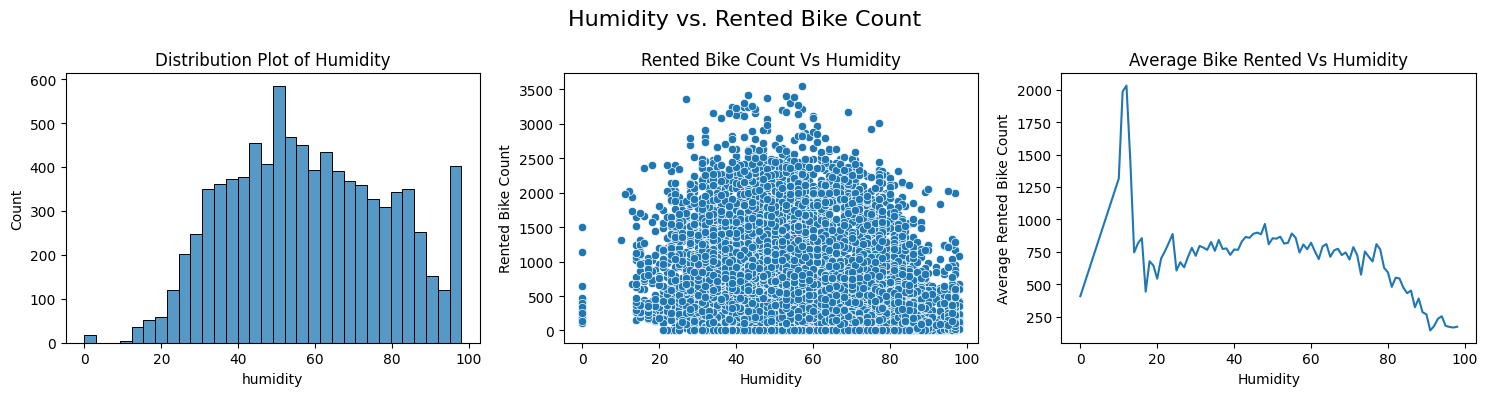

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Humidity vs. Rented Bike Count', fontsize=16)

# Univariate analysis: Distribution Plot of Humidity
sns.histplot(bike_df['humidity'], ax=axes[0])
axes[0].set_title('Distribution Plot of Humidity')

# Bivariate analysis: Rented Bike Count Vs Humidity
sns.scatterplot(data=bike_df, x='humidity', y='rented_bike_count', ax=axes[1])
axes[1].set_xlabel('Humidity')
axes[1].set_ylabel('Rented Bike Count')
axes[1].set_title('Rented Bike Count Vs Humidity')

# Line Plot: Average Bike Rented Vs Humidity
grouped_data = bike_df.groupby('humidity')['rented_bike_count'].mean().reset_index()
sns.lineplot(data=grouped_data, x='humidity', y='rented_bike_count', ax=axes[2])
axes[2].set_xlabel('Humidity')
axes[2].set_ylabel('Average Rented Bike Count')
axes[2].set_title('Average Bike Rented Vs Humidity')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Key Insights:

*   The rental bike count exhibits significant fluctuations, with a peak around 50.
*   The most favorable humidity range for bike rentals falls between 20 and 90, indicating that customers prefer conditions within this range.

##3.6 Column: 'wind_speed'

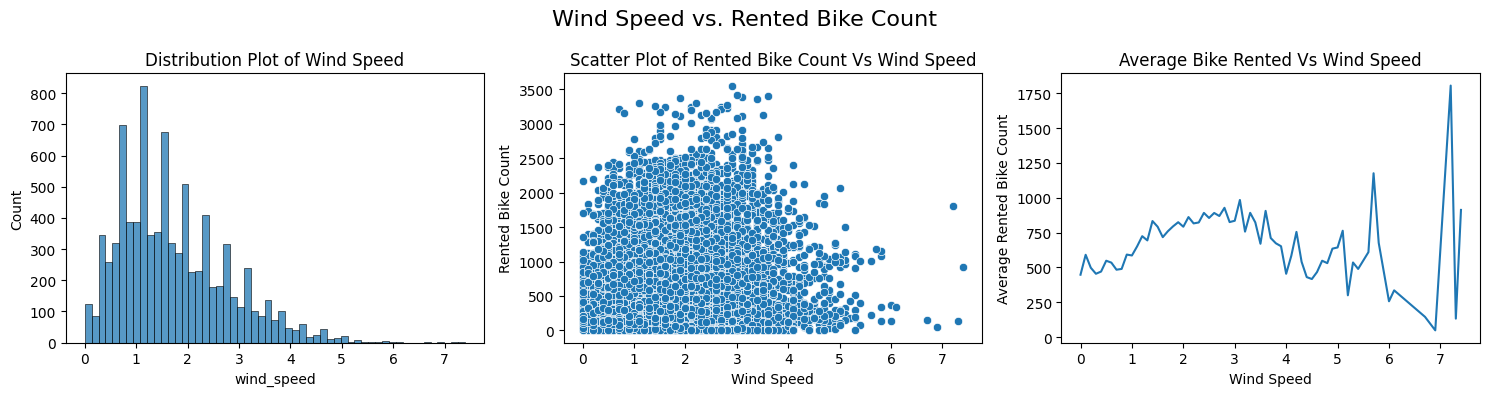

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Wind Speed vs. Rented Bike Count', fontsize=16)

# Univariate analysis: Distribution Plot of Wind Speed
sns.histplot(bike_df['wind_speed'], ax=axes[0])
axes[0].set_title('Distribution Plot of Wind Speed')

# Bivariate analysis: Rented Bike Count Vs Wind Speed
sns.scatterplot(data=bike_df, x='wind_speed', y='rented_bike_count', ax=axes[1])
axes[1].set_xlabel('Wind Speed')
axes[1].set_ylabel('Rented Bike Count')
axes[1].set_title('Scatter Plot of Rented Bike Count Vs Wind Speed')

# Line Plot: Average Bike Rented Vs Wind Speed
grouped_data = bike_df.groupby('wind_speed')['rented_bike_count'].mean().reset_index()
sns.lineplot(data=grouped_data, x='wind_speed', y='rented_bike_count', ax=axes[2])
axes[2].set_xlabel('Wind Speed')
axes[2].set_ylabel('Average Rented Bike Count')
axes[2].set_title('Average Bike Rented Vs Wind Speed')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Key Insights:

*   Wind speed follows a slightly positive skew in its distribution.
*   The scatter plot visually represents the relationship between wind speed and the rented bike count.
*   The line plot indicates that while moderate wind speeds are generally preferred, there is a notable increase in demand at a wind speed of 7.

##3.7 Column: 'visibility'

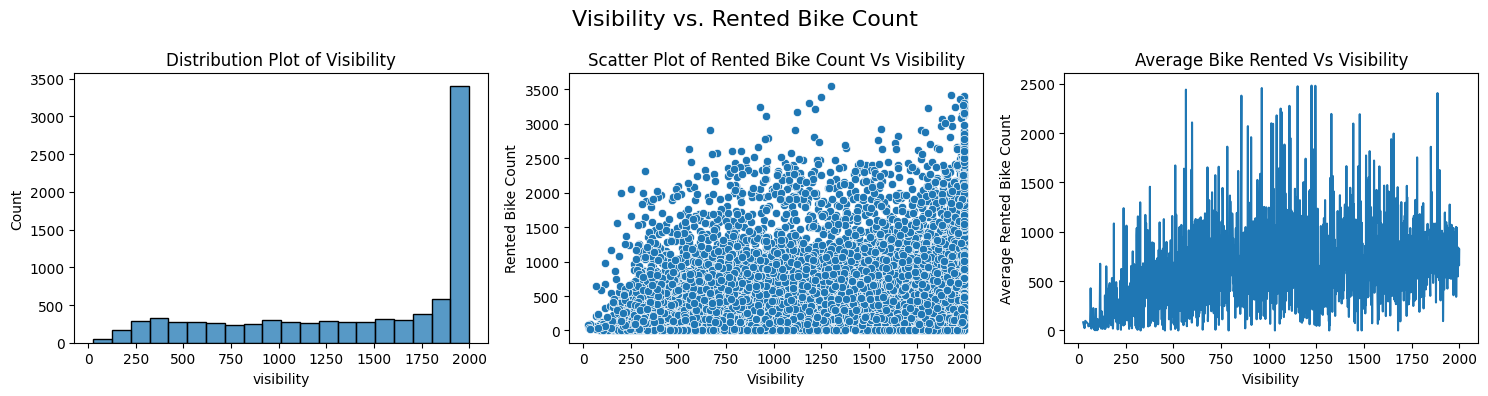

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Visibility vs. Rented Bike Count', fontsize=16)

# Univariate analysis: Distribution Plot of Visibility
sns.histplot(bike_df['visibility'], ax=axes[0])
axes[0].set_title('Distribution Plot of Visibility')

# Bivariate analysis: Rented Bike Count Vs Visibility
sns.scatterplot(data=bike_df, x='visibility', y='rented_bike_count', ax=axes[1])
axes[1].set_xlabel('Visibility')
axes[1].set_ylabel('Rented Bike Count')
axes[1].set_title('Scatter Plot of Rented Bike Count Vs Visibility')

# Line Plot: Average Bike Rented Vs Visibility
grouped_data = bike_df.groupby('visibility')['rented_bike_count'].mean().reset_index()
sns.lineplot(data=grouped_data, x='visibility', y='rented_bike_count', ax=axes[2])
axes[2].set_xlabel('Visibility')
axes[2].set_ylabel('Average Rented Bike Count')
axes[2].set_title('Average Bike Rented Vs Visibility')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Key Insights:

*   Visibility is left-skewed in its distribution.
*   The plots demonstrate a positive relationship between visibility and the number of rented bikes – as visibility increases, so does the rented bike count.

##3.8 Column: 'dew_point_temperature'

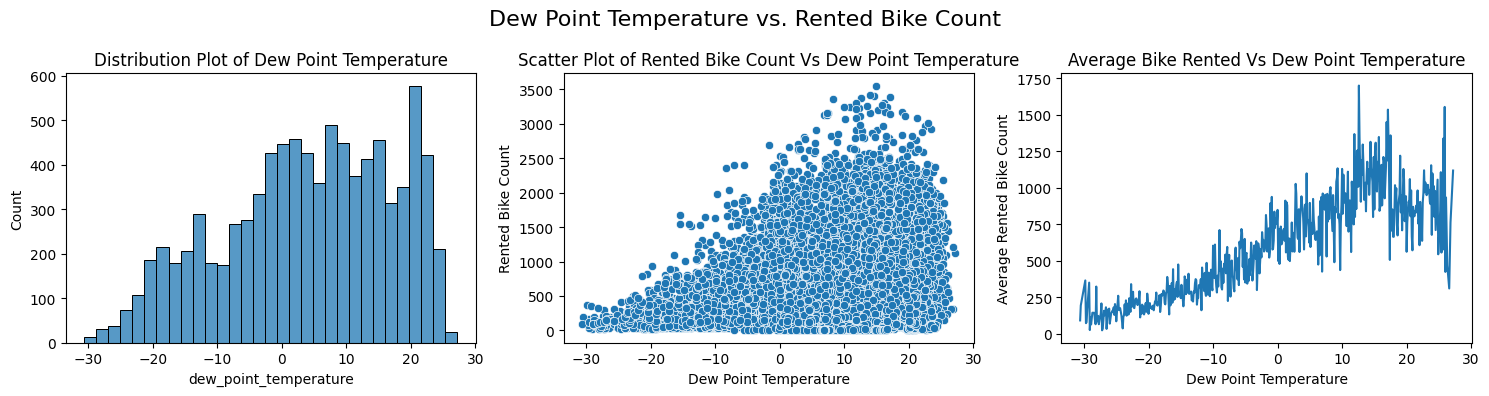

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Dew Point Temperature vs. Rented Bike Count', fontsize=16)

# Univariate analysis: Distribution Plot of Dew Point Temperature
sns.histplot(bike_df['dew_point_temperature'], ax=axes[0])
axes[0].set_title('Distribution Plot of Dew Point Temperature')

# Bivariate analysis: Rented Bike Count Vs Dew Point Temperature
sns.scatterplot(data=bike_df, x='dew_point_temperature', y='rented_bike_count', ax=axes[1])
axes[1].set_xlabel('Dew Point Temperature')
axes[1].set_ylabel('Rented Bike Count')
axes[1].set_title('Scatter Plot of Rented Bike Count Vs Dew Point Temperature')

# Line Plot: Average Bike Rented Vs Dew Point Temperature
grouped_data = bike_df.groupby('dew_point_temperature')['rented_bike_count'].mean().reset_index()
sns.lineplot(data=grouped_data, x='dew_point_temperature', y='rented_bike_count', ax=axes[2])
axes[2].set_xlabel('Dew Point Temperature')
axes[2].set_ylabel('Average Rented Bike Count')
axes[2].set_title('Average Bike Rented Vs Dew Point Temperature')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Key Insights:

*   Dew point temperature exhibits negative skewness and a positive correlation with the rented bike count.
*   The average number of rented bikes generally increases as the dew point temperature rises, except for a slight decrease at the highest dew point temperatures.
*   The line plot for dew point temperature follows a pattern similar to that of the temperature variable.

##3.9 Column: 'solar_radiation'

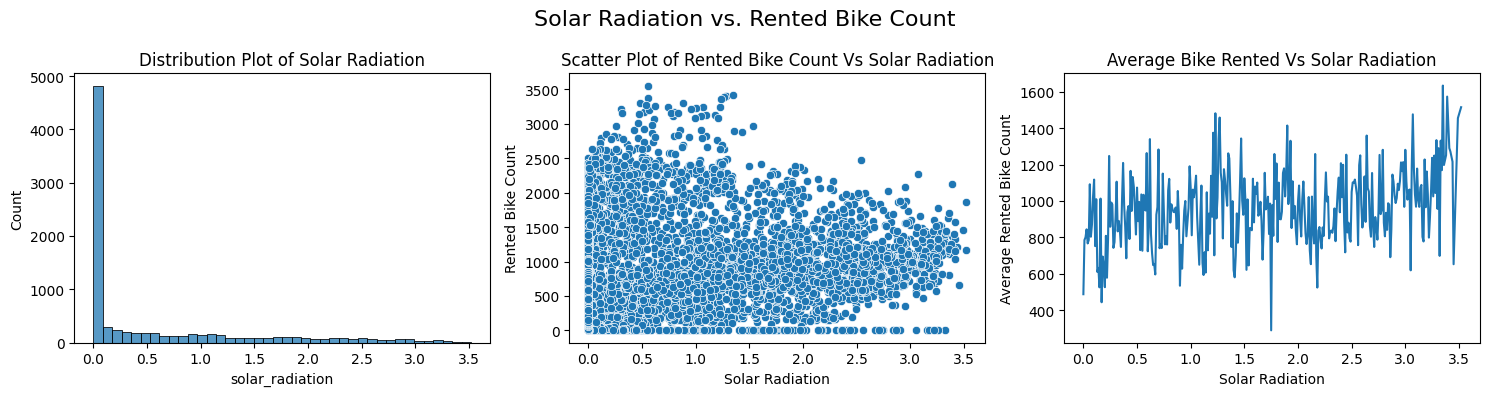

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Solar Radiation vs. Rented Bike Count', fontsize=16)

# Univariate analysis: Distribution Plot of Solar Radiation
sns.histplot(bike_df['solar_radiation'], ax=axes[0])
axes[0].set_title('Distribution Plot of Solar Radiation')

# Bivariate analysis: Rented Bike Count Vs Solar Radiation
sns.scatterplot(data=bike_df, x='solar_radiation', y='rented_bike_count', ax=axes[1])
axes[1].set_xlabel('Solar Radiation')
axes[1].set_ylabel('Rented Bike Count')
axes[1].set_title('Scatter Plot of Rented Bike Count Vs Solar Radiation')

# Line Plot: Average Bike Rented Vs Solar Radiation
grouped_data = bike_df.groupby('solar_radiation')['rented_bike_count'].mean().reset_index()
sns.lineplot(data=grouped_data, x='solar_radiation', y='rented_bike_count', ax=axes[2])
axes[2].set_xlabel('Solar Radiation')
axes[2].set_ylabel('Average Rented Bike Count')
axes[2].set_title('Average Bike Rented Vs Solar Radiation')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Key Insights:

*   Solar radiation shows a strong positive skew in its distribution.
*   The average number of rented bikes increases as solar radiation levels rise.
*   There is a direct relationship between solar radiation and temperature.

##3.10 Column: 'rainfall'

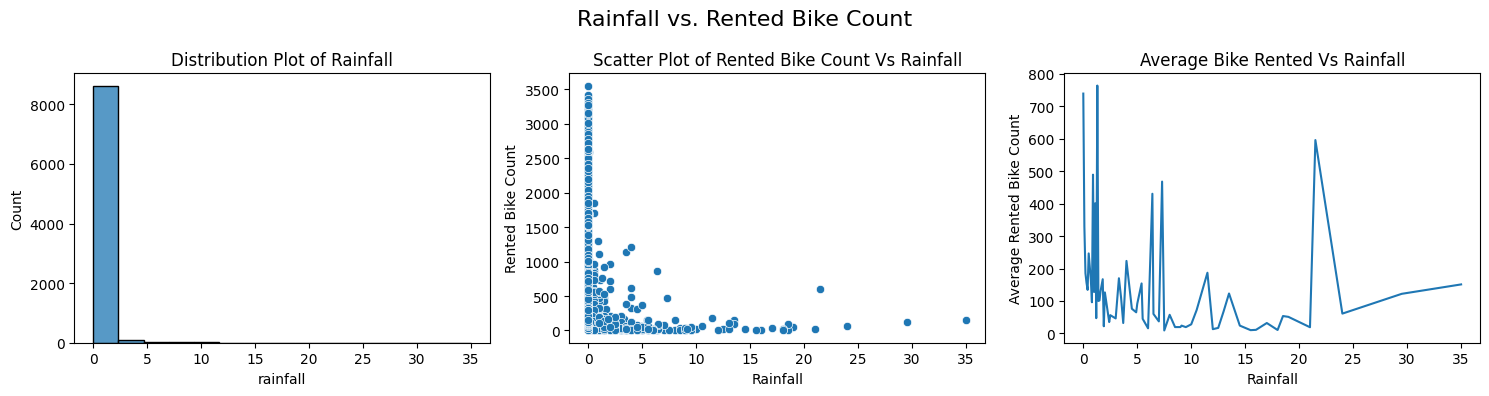

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Rainfall vs. Rented Bike Count', fontsize=16)

# Univariate analysis: Distribution Plot of Rainfall
sns.histplot(bike_df['rainfall'], ax=axes[0])
axes[0].set_title('Distribution Plot of Rainfall')

# Bivariate analysis: Rented Bike Count Vs Rainfall
sns.scatterplot(data=bike_df, x='rainfall', y='rented_bike_count', ax=axes[1])
axes[1].set_xlabel('Rainfall')
axes[1].set_ylabel('Rented Bike Count')
axes[1].set_title('Scatter Plot of Rented Bike Count Vs Rainfall')

# Line Plot: Average Bike Rented Vs Rainfall
grouped_data = bike_df.groupby('rainfall')['rented_bike_count'].mean().reset_index()
sns.lineplot(data=grouped_data, x='rainfall', y='rented_bike_count', ax=axes[2])
axes[2].set_xlabel('Rainfall')
axes[2].set_ylabel('Average Rented Bike Count')
axes[2].set_title('Average Bike Rented Vs Rainfall')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Key Insights:

*   The distribution of rainfall is highly positively skewed.
*   Users show a clear preference for days with little to no rainfall, indicating reduced bike rentals on rainy days.

##3.11 Column: 'snowfall'

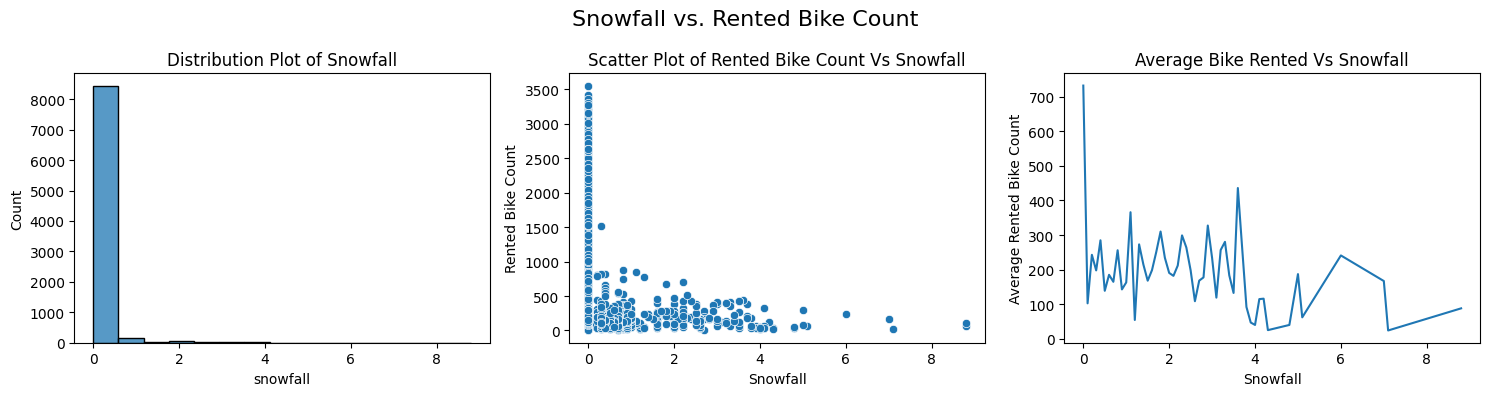

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Snowfall vs. Rented Bike Count', fontsize=16)

# Univariate analysis: Distribution Plot of Snowfall
sns.histplot(bike_df['snowfall'], ax=axes[0])
axes[0].set_title('Distribution Plot of Snowfall')

# Bivariate analysis: Rented Bike Count Vs Snowfall
sns.scatterplot(data=bike_df, x='snowfall', y='rented_bike_count', ax=axes[1])
axes[1].set_xlabel('Snowfall')
axes[1].set_ylabel('Rented Bike Count')
axes[1].set_title('Scatter Plot of Rented Bike Count Vs Snowfall')

# Line Plot: Average Bike Rented Vs Snowfall
grouped_data = bike_df.groupby('snowfall')['rented_bike_count'].mean().reset_index()
sns.lineplot(data=grouped_data, x='snowfall', y='rented_bike_count', ax=axes[2])
axes[2].set_xlabel('Snowfall')
axes[2].set_ylabel('Average Rented Bike Count')
axes[2].set_title('Average Bike Rented Vs Snowfall')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Key Insights:

*   The distribution of snowfall is highly positively skewed.
*   Users exhibit a clear preference for days with minimal or no snowfall, suggesting reduced bike rentals during snowy conditions.

##3.12 Column: 'seasons'

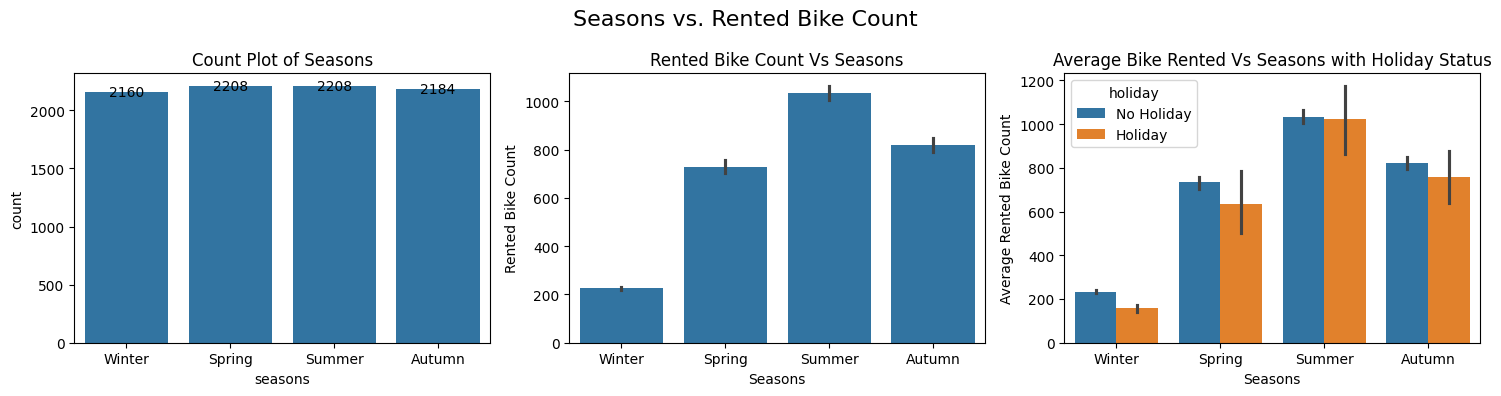

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Seasons vs. Rented Bike Count', fontsize=16)

# Univariate analysis: Count Plot of Seasons
count = sns.countplot(data=bike_df, x='seasons', ax=axes[0])
count.set_title('Count Plot of Seasons')

# Add value counts on top of the bars
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Bivariate analysis: Rented Bike Count Vs Seasons
bar = sns.barplot(data=bike_df, x='seasons', y='rented_bike_count', ax=axes[1])
bar.set_xlabel('Seasons')
bar.set_ylabel('Rented Bike Count')
bar.set_title('Rented Bike Count Vs Seasons')

# Multivariate analysis: Average Bike Rented Vs Seasons with holiday status
cat = sns.barplot(data=bike_df, x='seasons', y='rented_bike_count', hue='holiday', ax=axes[2])
cat.set_xlabel('Seasons')
cat.set_ylabel('Average Rented Bike Count')
cat.set_title('Average Bike Rented Vs Seasons with Holiday Status')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Key Insights:

*   The dataset includes data for all four seasons, with each season having over 2,000 counts.
*   Summer stands out as the most popular season for bike rentals, while winter is the least favored, indicating a strong preference for renting bikes in warmer weather.
*   Across all seasons, non-holiday days consistently have higher bike rental counts compared to holiday days, suggesting that people are more likely to rent bikes for daily commuting or leisure on non-holidays.

##3.13 Column: 'holiday'

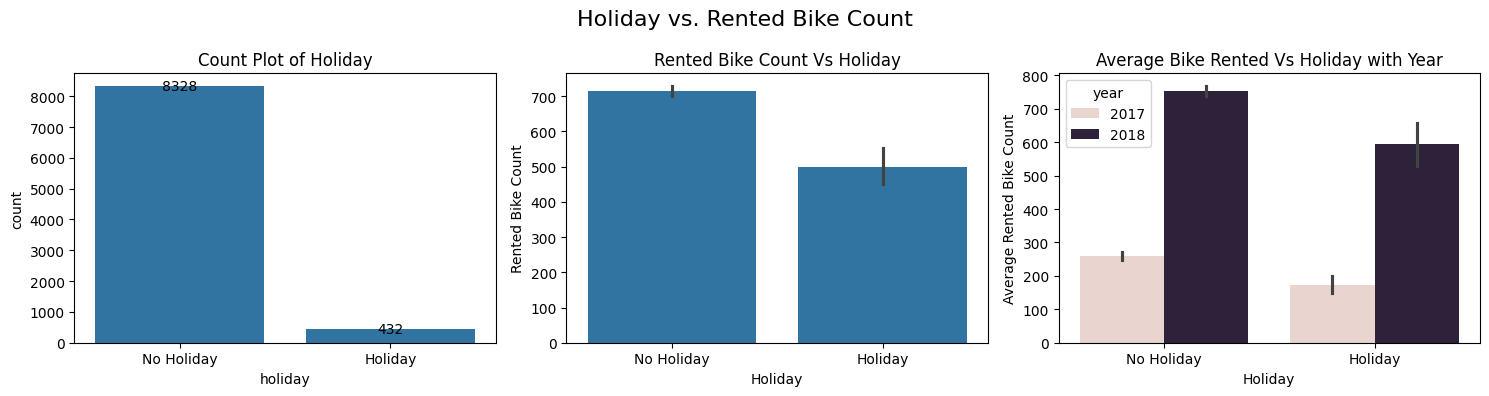

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Holiday vs. Rented Bike Count', fontsize=16)

# Univariate analysis: Count Plot of Holiday
count = sns.countplot(data=bike_df, x='holiday', ax=axes[0])
count.set_title('Count Plot of Holiday')

# Add value counts on top of the bars
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Bivariate analysis: Rented Bike Count Vs Holiday
bar = sns.barplot(data=bike_df, x='holiday', y='rented_bike_count', ax=axes[1])
bar.set_xlabel('Holiday')
bar.set_ylabel('Rented Bike Count')
bar.set_title('Rented Bike Count Vs Holiday')

# Multivariate analysis: Average Bike Rented Vs Holiday with Year
cat = sns.barplot(data=bike_df, x='holiday', y='rented_bike_count', hue='year', ax=axes[2])
cat.set_xlabel('Holiday')
cat.set_ylabel('Average Rented Bike Count')
cat.set_title('Average Bike Rented Vs Holiday with Year')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Key Insights:

*   The dataset contains a larger number of records for non-holiday days compared to holiday days. This is expected, as most days are working days.
*   On non-holiday days, there is a higher demand for bike sharing, suggesting that these rentals are primarily related to work or daily commuting.
*   The dataset also includes more records from the year 2018 than from 2017, indicating an increase in the usage of the bike-sharing service over time.

##3.14 Column: 'functioning_day'

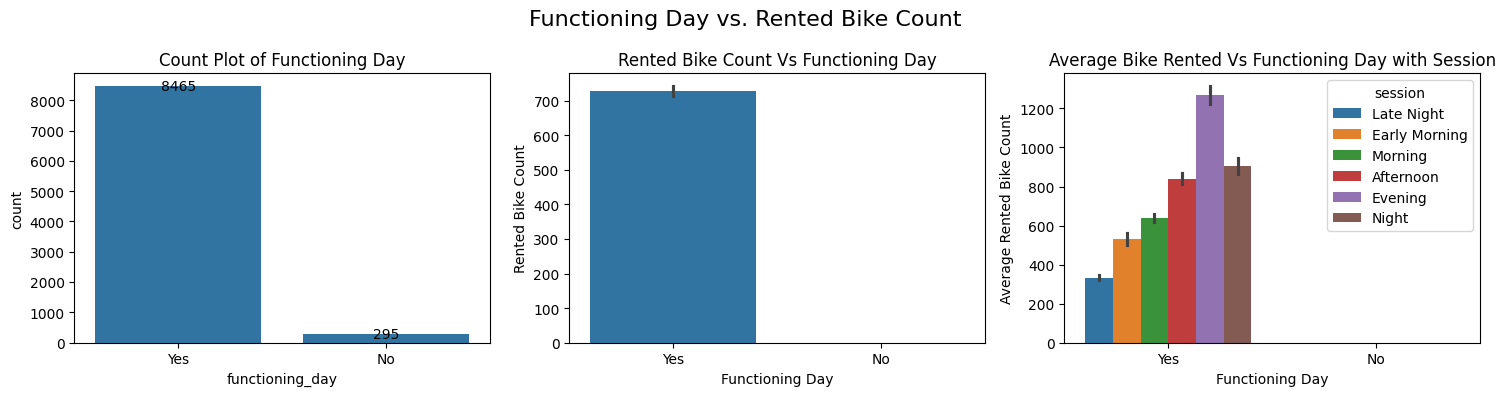

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Functioning Day vs. Rented Bike Count', fontsize=16)

# Univariate analysis: Count Plot of Functioning Day
count = sns.countplot(data=bike_df, x='functioning_day', ax=axes[0])
count.set_title('Count Plot of Functioning Day')

# Add value counts on top of the bars
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Bivariate analysis: Rented Bike Count Vs Functioning Day
bar = sns.barplot(data=bike_df, x='functioning_day', y='rented_bike_count', ax=axes[1])
bar.set_xlabel('Functioning Day')
bar.set_ylabel('Rented Bike Count')
bar.set_title('Rented Bike Count Vs Functioning Day')

# Multivariate analysis: Average Bike Rented Vs Functioning Day with Session
cat = sns.barplot(data=bike_df, x='functioning_day', y='rented_bike_count', hue='session', ax=axes[2])
cat.set_xlabel('Functioning Day')
cat.set_ylabel('Average Rented Bike Count')
cat.set_title('Average Bike Rented Vs Functioning Day with Session')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Key Insights:

*   The dataset predominantly consists of records for functioning days, which aligns with the fact that most days are working days.
*   Despite having some records for non-functioning days, there are no bike rentals during such days, indicating that the bike-sharing service is primarily utilized on functioning days.
*   On functioning days, the evening hours experience the highest demand for rented bikes, likely due to commuters using bikes for their daily work commutes.

##4. Data Cleaning

Data cleaning encompasses the essential practice of spotting and rectifying inaccuracies, disparities, and the absence of data points within a dataset. Positioned as a pivotal phase in the data preparation journey, it holds the responsibility of guaranteeing the data's accuracy, comprehensiveness, and presentation in an analyzable structure. This procedure incorporates actions like eliminating duplicate entries, addressing missing information, rectifying errors, and ensuring uniform data structures. The overarching aim of data cleaning is to enhance data quality, rendering it apt for subsequent analytical exploration and modeling.

##4.1 Duplicate Values

In [ ]:
# counting duplicate values
bike_df.duplicated().sum()

np.int64(0)

##4.2 Missing Values

In [ ]:
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
year                     0
month                    0
day                      0
weekday                  0
session                  0
dtype: int64


<Axes: >

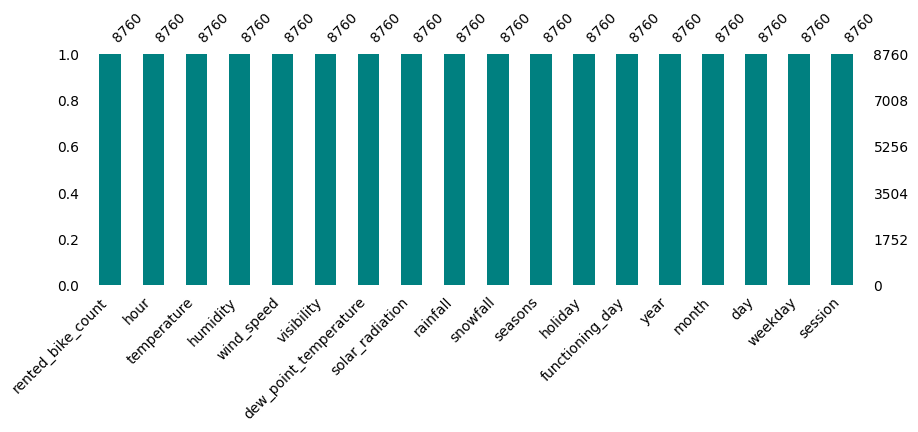

In [ ]:
# Visualizing the missing values
msno.bar(bike_df, color='teal', sort='ascending', figsize=(10,3), fontsize=10)

Fortunately there is no missing value in the dataset

##4.3 Skewness

In [ ]:
# statistical summary
bike_df.describe().T

count         mean         std     min      25%  \
rented_bike_count      8760.0   704.602055  644.997468     0.0   191.00   
hour                   8760.0    11.500000    6.922582     0.0     5.75   
temperature            8760.0    12.882922   11.944825   -17.8     3.50   
humidity               8760.0    58.226256   20.362413     0.0    42.00   
wind_speed             8760.0     1.724909    1.036300     0.0     0.90   
visibility             8760.0  1436.825799  608.298712    27.0   940.00   
dew_point_temperature  8760.0     4.073813   13.060369   -30.6    -4.70   
solar_radiation        8760.0     0.569111    0.868746     0.0     0.00   
rainfall               8760.0     0.148687    1.128193     0.0     0.00   
snowfall               8760.0     0.075068    0.436746     0.0     0.00   
year                   8760.0  2017.915068    0.278796  2017.0  2018.00   
month                  8760.0     6.526027    3.448048     1.0     4.00   
day                    8760.0    15.720548    8.796749     1.0     8.00   

                           50%      75%      max  
rented_bike_count       504.50  1065.25  3556.00  
hour                     11.50    17.25    23.00  
temperature              13.70    22.50    39.40  
humidity                 57.00    74.00    98.00  
wind_speed                1.50     2.30     7.40  
visibility             1698.00  2000.00  2000.00  
dew_point_temperature     5.10    14.80    27.20  
solar_radiation           0.01     0.93     3.52  
rainfall                  0.00     0.00    35.00  
snowfall                  0.00     0.00     8.80  
year                   2018.00  2018.00  2018.00  
month                     7.00    10.00    12.00  
day                      16.00    23.00    31.00

Upon inspecting the statistical summary of the numerical attributes, a conspicuous divergence between the 75th percentile and the maximum value becomes evident. This divergence serves as an indicator of skewness and the presence of outliers within the dataset, warranting attention.

In [ ]:
# Numerical Features: Features with more than 35 unique values.
numerical_features = [col for col in bike_df.columns if bike_df[col].nunique() > 35]

# Categorical Features: Features with 35 or fewer unique values.
categorical_features = [col for col in bike_df.columns if col not in numerical_features]

# Print the lists of numerical and categorical features.
print(f'Numerical Features: {numerical_features}')
print(f'Categorical Features: {categorical_features}')



Numerical Features: ['rented_bike_count', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']
Categorical Features: ['hour', 'seasons', 'holiday', 'functioning_day', 'year', 'month', 'day', 'weekday', 'session']


In [ ]:
# Columns to remove from the numerical_features list
columns_to_remove = ['rented_bike_count', 'rainfall', 'snowfall']

# Remove specified columns from numerical_features
numerical_features = [col for col in numerical_features if col not in columns_to_remove]


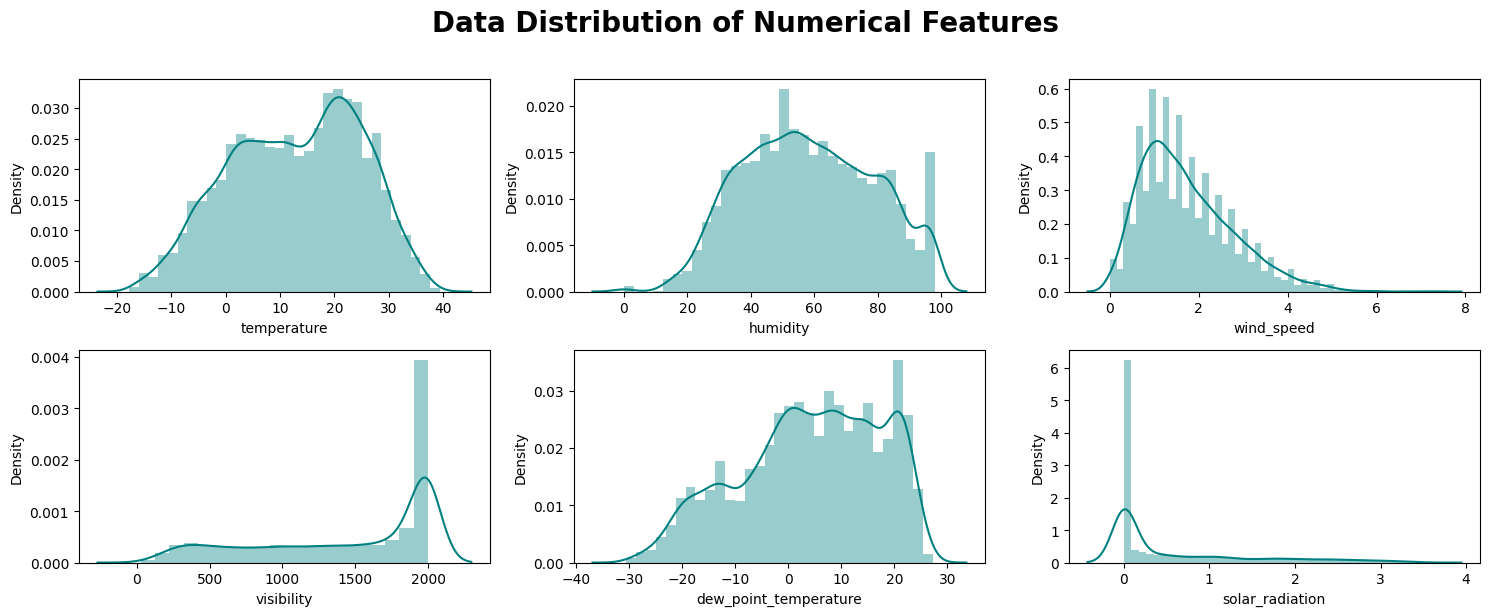

In [ ]:
# Set the color
plot_color = 'teal'

# Set the figure size
plt.figure(figsize=(15, 6))

# Set the title
plt.suptitle('Data Distribution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

# Loop through the numerical features
for i, col in enumerate(numerical_features):
    # Create subplots with 2 rows and 3 columns
    plt.subplot(2, 3, i+1)

    # Plot the distribution
    sns.distplot(bike_df[col], color=plot_color)

    # Set x-axis label
    plt.xlabel(col)

    plt.tight_layout()

# Show the plots
plt.show()

Key Insights:

*   When examining the numerical attributes, it becomes evident that the prevailing distributions are skewed to the right. Particularly, the distributions of rainfall, snowfall, and solar radiation exhibit pronounced right-skewness, indicating the presence of numerous outliers. Conversely, some variables display negative skewness.

*   Furthermore, it is worth noting that the removal of outliers from certain columns can potentially render their distributions more normal. Consequently, it appears imperative to address outliers prior to considering transformation techniques. The established approach involves the initial removal of outliers, followed by an assessment of the necessity for further transformation.

##4.4 Treating Outliers

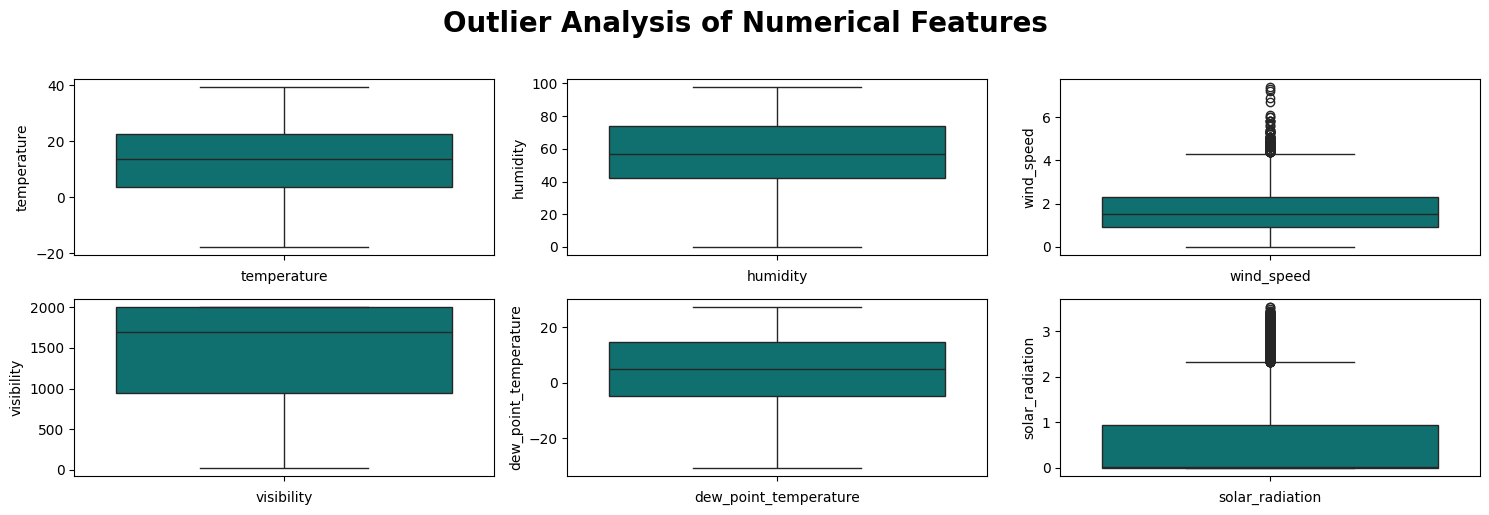

In [ ]:
# Set the color
plot_color = 'teal'

# Set the figure size
plt.figure(figsize=(15, 5))

# Set the title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

# Loop through the numerical features
for i, col in enumerate(numerical_features):
    # Create subplots with 2 rows and 3 columns
    plt.subplot(2, 3, i+1)

    # Plot boxplots to analyze outliers
    sns.boxplot(bike_df[col], color=plot_color)

    # Set x-axis label
    plt.xlabel(col)

    plt.tight_layout()

# Show the plots
plt.show()


Key Insights:

*   The presence of outliers is noticeable in the 'wind_speed' and 'solar_radiation' columns.
*   Due to the relatively limited dataset size, a cautious approach is taken regarding outlier handling. Instead of outright removal, the clipping method is employed.

Clipping Method:

The application of the clipping method involves establishing upper and lower thresholds to identify outliers. When a value exceeds these thresholds, it is considered an outlier and is consequently replaced with either the maximum or minimum value within the defined range. This method allows for a more controlled approach to handling outliers without losing valuable data.

In [ ]:
def clip_outliers(bike_df):
    # For each numerical feature in the dataset
    for col in bike_df[numerical_features]:
        # Calculate the lower and upper bounds using the IQR method
        q1 = bike_df[col].quantile(0.25)
        q3 = bike_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Replace outlier data points with the calculated upper and lower bounds
        bike_df[col] = bike_df[col].clip(lower_bound, upper_bound)

    return bike_df


In [ ]:
# using the function to treat outliers
bike_df = clip_outliers(bike_df)

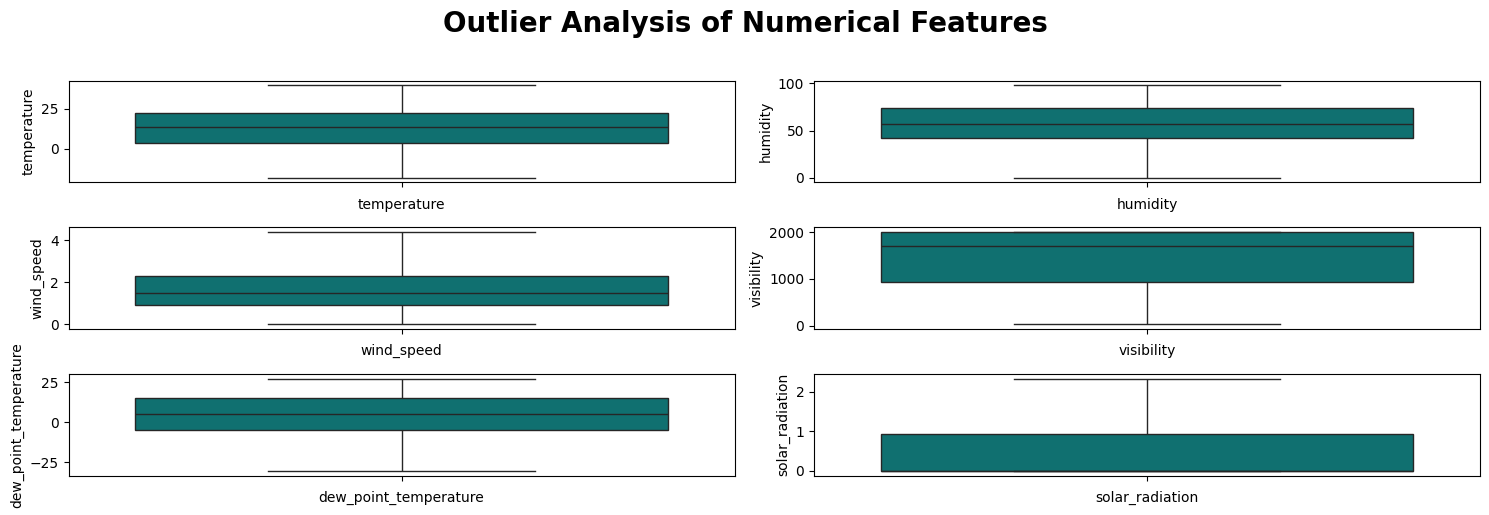

In [ ]:
# Set the color
boxplot_color = 'teal'

# Set the figure size
plt.figure(figsize=(15, 5))

# Set the title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

# Loop through the numerical features
for i, col in enumerate(numerical_features):
    # Create subplots with 3 rows and 2 columns
    plt.subplot(3, 2, i+1)

    # Plot boxplots to analyze outliers with the specified color
    sns.boxplot(bike_df[col], color=boxplot_color)

    # Set x-axis label
    plt.xlabel(col)

    plt.tight_layout()

# Show the plots
plt.show()

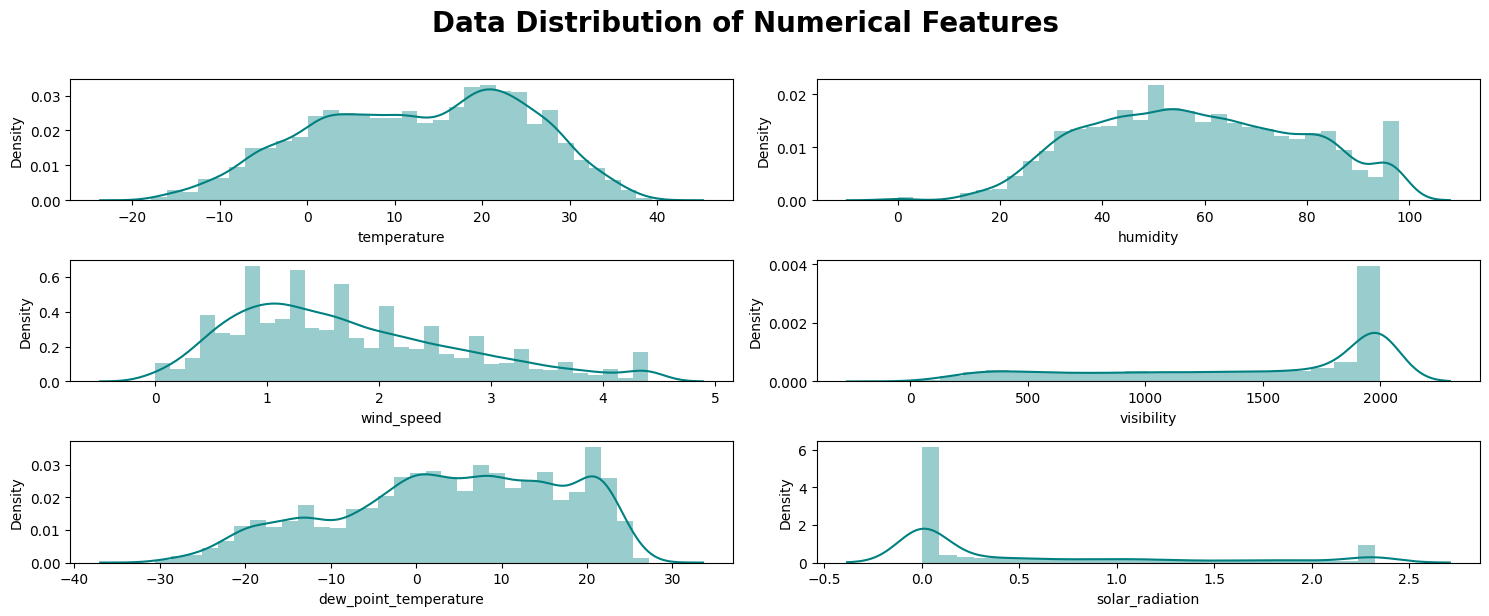

In [ ]:
# Set the color
plot_color = 'teal'

# Set the figure size
plt.figure(figsize=(15, 6))

# Set the title
plt.suptitle('Data Distribution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

# Loop through the numerical features
for i, col in enumerate(numerical_features):
    # Create subplots with 3 rows and 2 columns
    plt.subplot(3, 2, i + 1)

    # Plot distribution plots
    sns.distplot(bike_df[col], color=plot_color)

    # Set x-axis label
    plt.xlabel(col)
    plt.tight_layout()

# Show the plots
plt.show()


Key Insights:

*   The treatment of outliers has induced noticeable shifts in the data distribution.
*   Several features exhibited significant skewness before the outlier treatment, but post-treatment, they align more closely with a normal distribution.
*   Consequently, there is no current need for employing numerical feature transformation techniques, as the data is now more amenable to analysis and modeling.

##5. Feature Engineering & Data Pre-processing

*   Feature engineering refers to the process of enhancing a machine learning model's performance by creating new features or selecting the most pertinent ones from existing data.
*   It involves transforming raw data into a more informative format that can be effectively interpreted by the model.
*   The quality of features utilized as inputs significantly influences the success of a machine learning model, underscoring the crucial role played by feature engineering in optimizing model performance.

##5.1 Regression plot

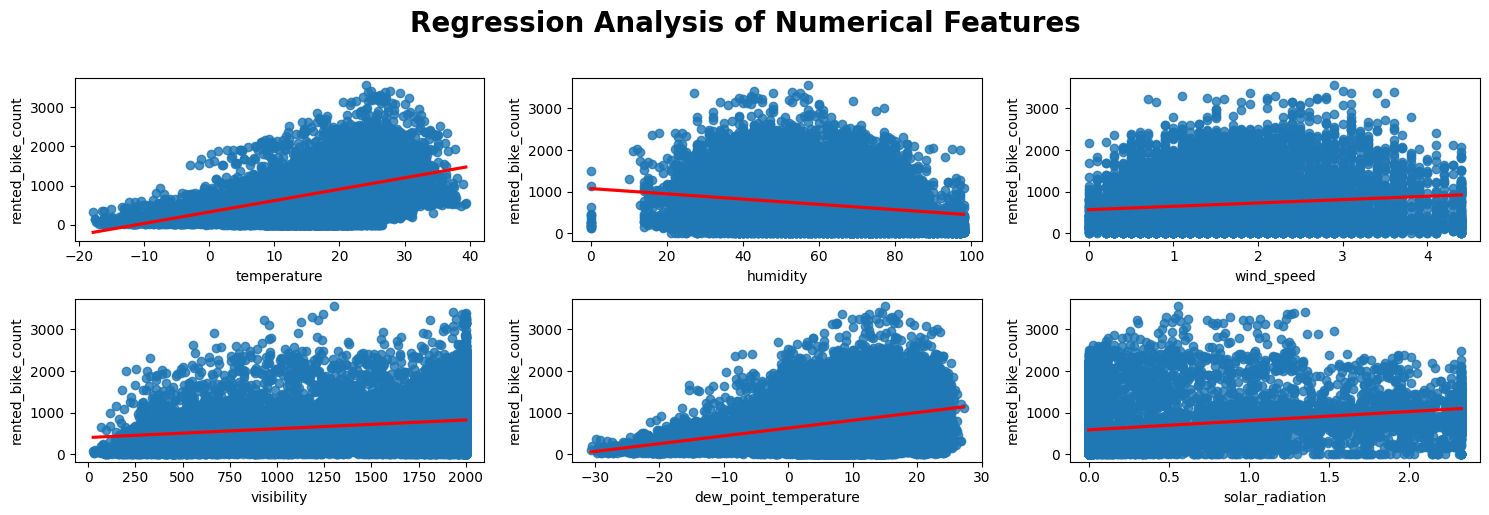

In [ ]:
# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
fig.suptitle('Regression Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

# Iterate through numerical features and create regression plots
for ax, col in zip(axes.flat, numerical_features):
    sns.regplot(x=col, y='rented_bike_count', data=bike_df, line_kws={"color": "r"}, ax=ax)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()


Most of the numerical features are positively correlated to our target variable.

##5.2 Correlation Coefficient and Heatmap

*   The correlation coefficient quantifies the strength and direction of a linear relationship between two variables.
*   It varies from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.
*   Correlation analysis aids in recognizing associations between variables and supports feature selection by identifying and removing highly correlated features, which can enhance model performance by reducing overfitting.

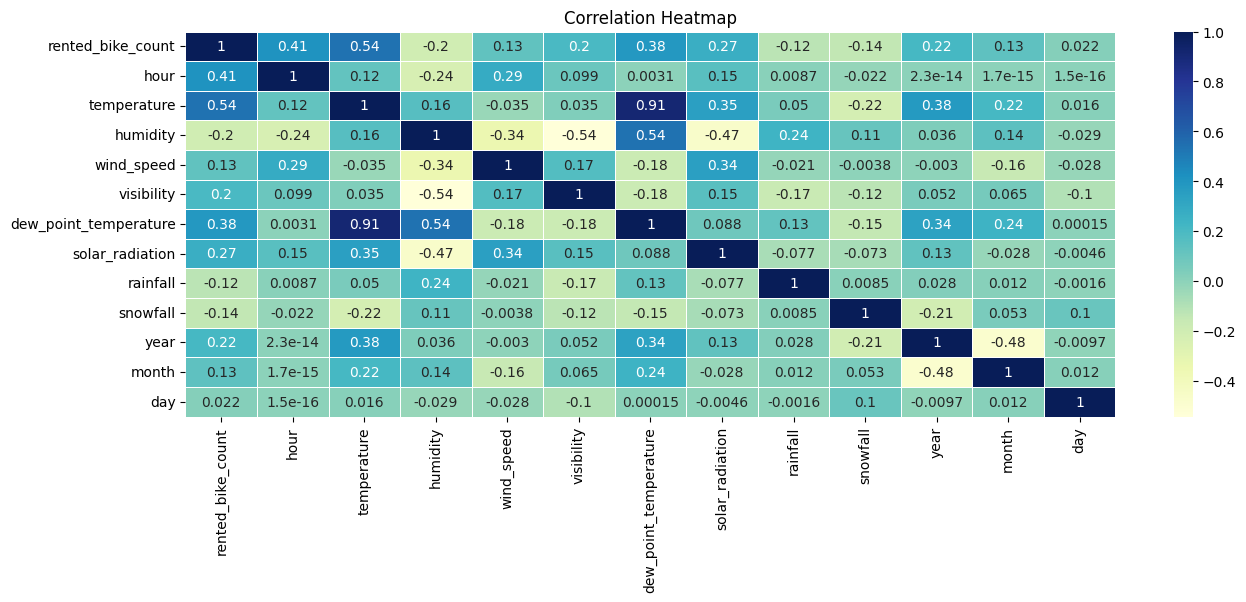

In [ ]:
# Select only numeric columns for correlation
numeric_df = bike_df.select_dtypes(include='number')

# Plotting correlation heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
def find_highly_correlated_features(dataset, threshold):
    correlated_features = set()  # Create an empty set to store correlated feature names
    correlation_matrix = dataset.corr().abs()  # Compute the absolute correlation matrix

    # Iterate through the columns of the correlation matrix
    for i, column in enumerate(correlation_matrix.columns):
        # Iterate through columns before the current column
        for j in range(i):
            # Check if the absolute correlation value is greater than the specified threshold
            if correlation_matrix.iloc[i, j] > threshold:
                correlated_features.add(column)  # Add the column name to the set of correlated features

    return correlated_features  # Return the set of highly correlated features


In [ ]:
def find_highly_correlated_features(df, threshold=0.7):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include='number')

    # Compute the correlation matrix
    corr_matrix = numeric_df.corr().abs()

    # Create a set to hold the correlated feature names
    correlated_features = set()

    # Iterate through the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:
                colname = corr_matrix.columns[i]
                correlated_features.add(colname)

    print(f"Features with correlation greater than {threshold}:")
    print(correlated_features)
    return correlated_features


In [ ]:
# checking the highly correlated features
find_highly_correlated_features(bike_df, 0.7)          # setting threshold of 0.7

Features with correlation greater than 0.7:
{'dew_point_temperature'}


{'dew_point_temperature'}

Key Insights:

*   Due to the high correlation coefficient (0.91) between dew_point_temperature and temperature, we have chosen to drop dew_point_temperature.
*   Dew_point_temperature shows less correlation with our target variable, making it a less relevant feature for our predictive model.
*   This decision simplifies the model and removes potential multicollinearity, which can improve model interpretability and performance.

In [ ]:
# droping dew_point_temperature column due to multi-collinearity

bike_df.drop('dew_point_temperature', axis=1, inplace=True)

##5.3 Variance Inflation Factor(VIF) Analysis Explanation:

*   VIF analysis is a statistical technique used to detect multicollinearity within a set of predictor variables in a regression model.
*   Multicollinearity occurs when two or more predictors are highly correlated, leading to redundant information in the model.
*   This analysis is crucial for building reliable and interpretable regression models by identifying and addressing multicollinearity.
*   VIF analysis helps to ensure that each predictor variable contributes unique information to the model, improving its overall quality and accuracy.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()  # Create an empty DataFrame to store VIF values
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns  # Include the feature names in the DataFrame
    return vif  # Return the DataFrame containing VIF values and feature names

In [ ]:
calculate_vif(bike_df[[i for i in bike_df.describe().columns]])

VIF Factor           features
0     4.148152  rented_bike_count
1     5.057519               hour
2     4.975346        temperature
3    25.163675           humidity
4     5.097955         wind_speed
5    10.752074         visibility
6     2.899224    solar_radiation
7     1.109986           rainfall
8     1.150058           snowfall
9    64.699372               year
10    5.126151              month
11    4.381096                day

Removing 'Year' Due to High VIF:

*   'Year' has a high Variance Inflation Factor (VIF), indicating strong multicollinearity.
*   Multicollinearity hinders the model's reliability and interpretability.
*   To address this issue, we have decided to remove 'Year' as a predictor variable from the dataset before constructing our model.
*   By doing so, we aim to improve the model's performance and reduce the impact of multicollinearity.

In [ ]:
# List of columns to drop
columns_to_drop = ['year', 'weekday', 'session']

# Check if columns exist in the DataFrame before attempting to drop them
columns_to_drop = [col for col in columns_to_drop if col in bike_df.columns]

# Drop the specified columns from the DataFrame
bike_df.drop(columns_to_drop, axis=1, inplace=True)


In [ ]:
# Calculating the VIF again
calculate_vif(bike_df[[i for i in bike_df.describe().columns]])

VIF Factor           features
0     4.107355  rented_bike_count
1     4.717690               hour
2     4.467436        temperature
3     7.146029           humidity
4     4.884263         wind_speed
5     5.572086         visibility
6     2.360703    solar_radiation
7     1.104067           rainfall
8     1.139390           snowfall
9     5.056057              month
10    3.788415                day

Final Numerical Variables for Model Building:

*   After data preprocessing, handling outliers, and addressing multicollinearity, we have identified the numerical variables that will be used as predictors in our model.
*   These selected variables have been refined to ensure their quality and relevance for building a robust predictive model.
*   The final set of numerical features will play a crucial role in the accuracy and performance of our machine learning model.

##5.4 Encoding in Feature Engineering:

*   Encoding is a fundamental technique in feature engineering that transforms categorical variables into numerical values suitable for machine learning algorithms.
*   Various encoding methods are available, each with its unique approach:
    1. One-hot encoding: Generates binary columns for each category, indicating its presence or absence.
    2. Label encoding: Assigns a unique integer to each category.
    3. Ordinal encoding: Assigns ordered integers based on the natural order of categories.
    4. Count encoding: Replaces categories with their occurrence frequency in the dataset.
*   The choice of encoding method depends on the nature of the categorical data and the requirements of the machine learning model.

In [ ]:
# Filter the categorical features for columns that exist in the DataFrame
valid_categorical_features = [col for col in categorical_features if col in bike_df.columns]

# Check Unique Values for each valid categorical variable
for col in valid_categorical_features:
    unique_values = bike_df[col].nunique()
    print(f"{col}: unique values is - {unique_values}")

hour: unique values is - 24
seasons: unique values is - 4
holiday: unique values is - 2
functioning_day: unique values is - 2
month: unique values is - 12
day: unique values is - 31


Encoding Choices:

*   For the 'seasons' feature, we'll employ one-hot encoding to represent different seasons as binary columns, preserving their distinctiveness.
*   'Holiday' and 'functioning_day' will be numerically encoded, as these variables have a binary nature with two meaningful categories.
*   Other columns are either already encoded or don't require encoding, simplifying the preprocessing step for our machine learning model.

In [ ]:
# One-hot encode the 'seasons' feature and merge with the original DataFrame
bike_df = pd.concat([bike_df, pd.get_dummies(bike_df['seasons'], prefix='seasons')], axis=1)

# Drop the original 'seasons' column
bike_df.drop('seasons', axis=1, inplace=True)

In [ ]:
# Numerical Encoding for 'holiday' and 'functioning_day'
bike_df['holiday'] = bike_df['holiday'].replace({'Holiday': 1, 'No Holiday': 0})
bike_df['functioning_day'] = bike_df['functioning_day'].replace({'Yes': 1, 'No': 0})

##5.5 Normalization of Target Variable

*   Data normalization, a vital aspect of data mining, involves the transformation of source data into a format suitable for efficient processing.
*   The core objective of data normalization is to minimize or remove duplicate data, streamlining it for further analysis and modeling.
*   By standardizing data, data normalization enhances the quality and consistency of information, making it more valuable for decision-making.

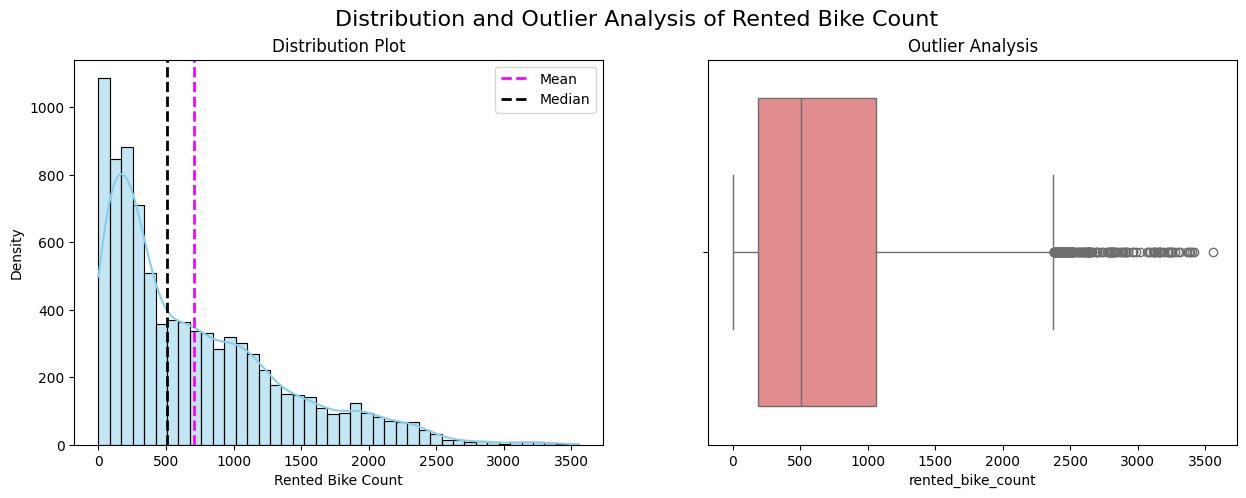

In [ ]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Set a common title for the entire figure
fig.suptitle("Distribution and Outlier Analysis of Rented Bike Count", fontsize=16)

# Distribution Plot
sns.histplot(bike_df['rented_bike_count'], kde=True, ax=ax1, color='skyblue')
ax1.axvline(bike_df['rented_bike_count'].mean(), color='magenta', linestyle='--', linewidth=2, label='Mean')
ax1.axvline(bike_df['rented_bike_count'].median(), color='black', linestyle='--', linewidth=2, label='Median')
ax1.set(xlabel='Rented Bike Count', ylabel='Density', title='Distribution Plot')
ax1.legend()

# Boxplot
sns.boxplot(x=bike_df['rented_bike_count'], ax=ax2, color='lightcoral')
ax2.set(title='Outlier Analysis')

# Display the plots
plt.show()

Key Insights:

*   The distribution of Rented Bike Count exhibits a moderate right skew, which doesn't align with the normal distribution assumption of linear regression. To address this, we should take steps to normalize the distribution.
*   A boxplot analysis reveals the presence of outliers in the Rented Bike Count column, which may impact the model's performance.

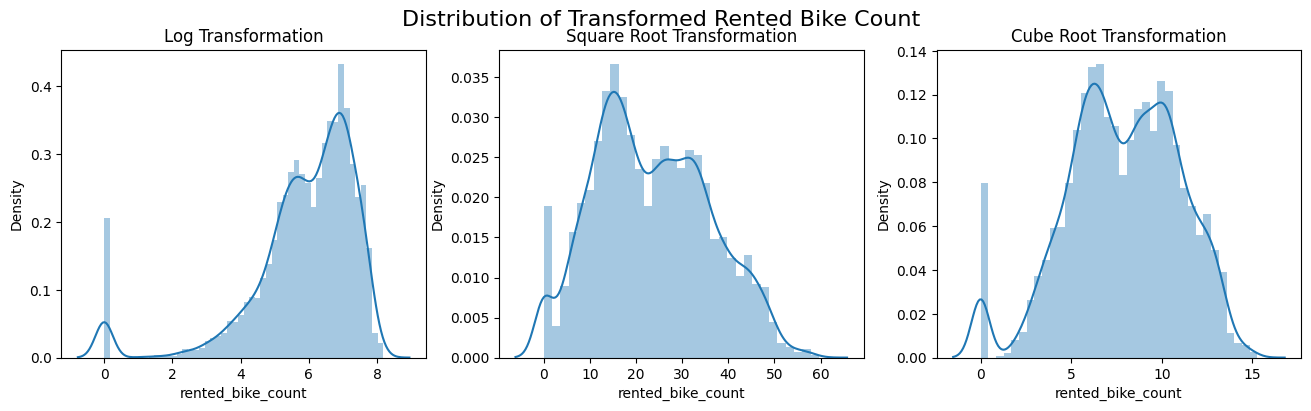

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Set a common title for the entire figure
fig.suptitle("Distribution of Transformed Rented Bike Count", fontsize=16)

# Transformation functions
transformations = [np.log1p, np.sqrt, np.cbrt]
transform_labels = ['Log Transformation', 'Square Root Transformation', 'Cube Root Transformation']

# Plot each transformation
for i, transform in enumerate(transformations):
    sns.distplot(transform(bike_df['rented_bike_count']), kde=True, ax=axs[i])
    axs[i].set(title=transform_labels[i])

# Display the plots
plt.show()


Key Insights:

*   Experimenting with various transformations on the dependent variable, including logarithmic, square root, and cube root, did not yield a normally distributed variable.
*   Among the transformations attempted, the square root transformation was most effective in achieving a more normally distributed form of the variable. This transformation will be utilized in the regression analysis.

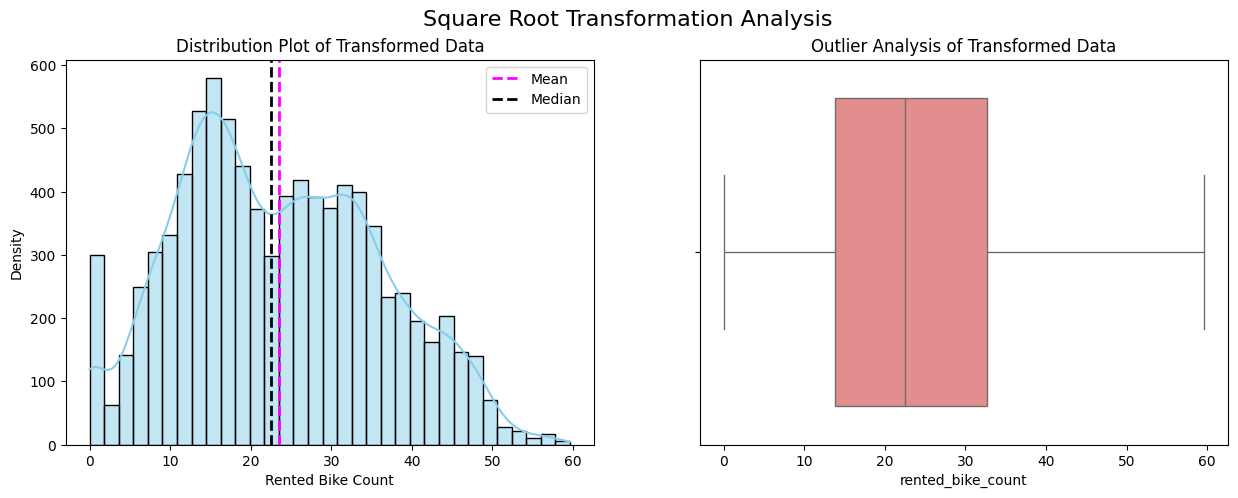

In [ ]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Square root transformation
transformed_data = np.sqrt(bike_df['rented_bike_count'])

# Set a common title for the entire figure
fig.suptitle("Square Root Transformation Analysis", fontsize=16)

# Distribution Plot
sns.histplot(transformed_data, kde=True, ax=ax[0], color='skyblue')
ax[0].axvline(transformed_data.mean(), color='magenta', linestyle='--', linewidth=2, label='Mean')
ax[0].axvline(transformed_data.median(), color='black', linestyle='--', linewidth=2, label='Median')
ax[0].set(xlabel='Rented Bike Count', ylabel='Density', title='Distribution Plot of Transformed Data')
ax[0].legend()

# Boxplot
sns.boxplot(x=transformed_data, ax=ax[1], color='lightcoral')
ax[1].set(title='Outlier Analysis of Transformed Data')

# Display the plots
plt.show()


Key Insights:

*   Employing the square root transformation on the initially skewed Rented Bike Count column led to a nearly normal distribution. This aligns with the common practice of normalizing skewed variables in linear regression.
*   After applying the square root transformation, we observed the absence of outliers in the Rented Bike Count column, indicating a more stable and reliable dataset for regression analysis.

##Manipulations done and insights found

*   Our data preparation involved several key steps to enhance the quality and suitability of our dataset for regression analysis.
*   We assessed the correlation between numerical features and the target variable, identifying positive correlations.
*   The correlation analysis indicated that dew_point_temperature and temperature were highly correlated, leading to the removal of dew_point_temperature due to lower correlation with the target variable.
*   Multicollinearity was addressed using VIF analysis, with 'year' removed from the dataset due to a high VIF factor.
*   Categorical features were encoded to enable the model's understanding, employing one-hot encoding for 'seasons' and numeric encoding for 'holiday' and 'functioning_day.'
*   We explored transformations for the target variable, finding that a square root transformation produced the best result, resulting in a more normalized distribution for regression analysis.

##6. ML Model Implementation

The "train-test split" is a fundamental practice in machine learning. It involves dividing a dataset into two subsets: the "training set" used to train a machine learning model and the "test set" used to evaluate its performance. This split allows for assessing how well the model generalizes to unseen data. Typically, a large portion of the data is allocated to training (e.g., 70-80%), while the remainder is reserved for testing. By evaluating the model on data it hasn't seen during training, we can estimate its ability to make accurate predictions on new, real-world data.

##6.1 Train Test Split

In [ ]:
# Separating the target variable and the feature matrix
X = bike_df.drop('rented_bike_count', axis=1)  # X contains features, excluding 'rented_bike_count'
y = np.sqrt(bike_df['rented_bike_count'])  # y contains the square root transformed 'rented_bike_count'

# Now, X contains the feature matrix, and y contains the transformed target variable.

# You can proceed to use X and y for your machine learning tasks.


In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print('Shape of X_train is:', X_train.shape)
print('Shape of X_test is:', X_test.shape)

Shape of X_train is: (7008, 16)
Shape of X_test is: (1752, 16)


##6.2 Scaling Data

In [ ]:
# Scaling Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Evaluation Metrics Used -
*   Mean Squared Error (MSE): This metric quantifies how close a regression model's predictions are to the actual data points. It measures the average of the squared differences between predicted and actual values.

*   Root Mean Square Error (RMSE): RMSE is a variation of MSE, but it provides the standard deviation of prediction errors, offering a more interpretable measure of model performance.

*   Mean Absolute Error (MAE): MAE calculates the average of the absolute differences between predicted and actual values, providing insight into the model's accuracy in predicting numerical values.

*   R-squared (R2): R2 is a statistical metric that signifies the proportion of variance in the dependent variable explained by the independent variables in a regression model. It ranges from 0 to 1, with higher values indicating better model fit.

*   Adjusted R-squared: Adjusted R2 is a modification of R2, accounting for the number of predictors in the model. It helps prevent overfitting by adjusting the goodness-of-fit for the model's complexity.

These evaluation metrics are essential for assessing the performance and accuracy of regression models, enabling data scientists and analysts to make informed decisions about model selection and refinement

In [ ]:
##6.3 Model Training

In [ ]:
# empty list for appending performance metric score
model_result = []

def predict(ml_model,model_name):

  '''
  Pass the model and predict value.
  Function will calculate all the evaluation metrics and appending those metrics score on model_result list.
  Plotting different graphs for test data.
  '''

  # model fitting
  model = ml_model.fit(X_train,y_train)

  # predicting values
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Reverse the transformation on the predictions    (In case if we need y_train_pred in original and transformed way)
  y_train_pred_original = np.power(y_train_pred, 2)
  y_test_pred_original = np.power(y_test_pred, 2)

  # graph --> best fit line on test data
  sns.regplot(x=y_test_pred, y=y_test, line_kws={'color':'red'})
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  '''Evaluation metrics on train data'''
  train_MSE  = round(mean_squared_error(y_train, y_train_pred),3)
  train_RMSE = round(np.sqrt(train_MSE),3)
  train_r2 = round(r2_score(y_train, y_train_pred),3)
  train_MAE = round(mean_absolute_error(y_train, y_train_pred),3)
  train_adj_r2 = round(1-(1-r2_score(y_train, y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),3)
  print(f'train MSE : {train_MSE}')
  print(f'train RMSE : {train_RMSE}')
  print(f'train MAE : {train_MAE}')
  print(f'train R2 : {train_r2}')
  print(f'train Adj R2 : {train_adj_r2}')
  print('-'*150)

  '''Evaluation metrics on test data'''
  test_MSE  = round(mean_squared_error(y_test, y_test_pred),3)
  test_RMSE = round(np.sqrt(test_MSE),3)
  test_r2 = round(r2_score(y_test, y_test_pred),3)
  test_MAE = round(mean_absolute_error(y_test, y_test_pred),3)
  test_adj_r2 = round(1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
  print(f'test MSE : {test_MSE}')
  print(f'test RMSE : {test_RMSE}')
  print(f'test MAE : {test_MAE}')
  print(f'test R2 : {test_r2}')
  print(f'test Adj R2 : {test_adj_r2}')
  print('-'*150)

  # graph --> actual vs predicted on test data
  plt.figure(figsize=(6,5))
  plt.plot((y_test_pred)[:20])
  plt.plot(np.array((y_test)[:20]))
  plt.legend(["Predicted","Actual"])
  plt.xlabel('Test Data on last 20 points')
  plt.show()
  print('-'*150)

  '''actual vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred, 'error':y_test-y_test_pred}
  print(pd.DataFrame(data=d).head().T)
  print('-'*150)

  # using the score from the performance metrics to create the final model_result.
  model_result.append({'model':model_name,
                       'train MSE':train_MSE,
                       'test MSE':test_MSE,
                       'train RMSE':train_RMSE,
                       'test RMSE':test_RMSE,
                       'train MAE':train_MAE,
                       'test MAE':test_MAE,
                       'train R2':train_r2,
                       'test R2':test_r2,
                       'train Adj R2':train_adj_r2,
                       'test Adj R2':test_adj_r2})

This code defines a function named predict that assesses the performance of a machine learning model. It takes the machine learning model and its name as inputs. The function trains the model, makes predictions on both the training and testing datasets, and calculates various evaluation metrics. It also reverses a square root transformation on the predictions, plots actual vs. predicted values, and stores key metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2), and more in the model_result list. This function aids in comparing and assessing different machine learning models. It provides insights into the model's effectiveness and stores the results for analysis.

##7. Model Implementation

##7.1 Linear Regression

Linear regression is a powerful statistical technique employed to establish a connection between a target variable and one or more predictor variables. It achieves this by determining the optimal linear equation that can best forecast the target variable's value, considering the predictor variables. Here are the key points:

*   Linear regression seeks to identify the most suitable line that captures the relationship between the dependent variable and one or more independent variables.
*   It's a fundamental tool for predicting outcomes, making it valuable in various fields, from finance to science, and it provides a foundation for more advanced modeling techniques.

train MSE : 54.005
train RMSE : 7.349
train MAE : 5.63
train R2 : 0.654
train Adj R2 : 0.653
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 52.984
test RMSE : 7.279
test MAE : 5.6
test R2 : 0.649
test Adj R2 : 0.646
------------------------------------------------------------------------------------------------------------------------------------------------------


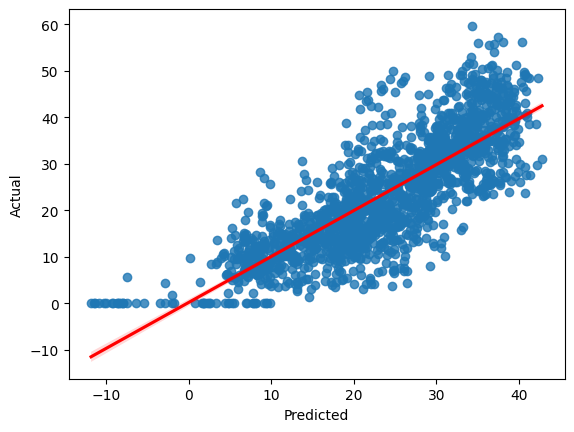

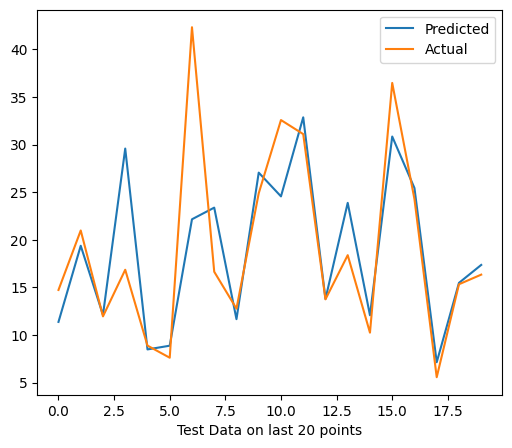

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.375774  19.371330  12.108396  29.577907  8.486525
error       3.355146   1.604847  -0.150135 -12.725608  0.401670
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(LinearRegression(), 'LinearRegression')

##7.2 Lasso

Lasso, which stands for Least Absolute Shrinkage and Selection Operator, is a regularization method applied in linear regression models. Its primary purpose is to simplify the model and enhance its ability to generalize by penalizing the size of feature coefficients.

*   Lasso introduces a penalty term in the optimization loss function that's related to the absolute values of the coefficients. This addition helps control the magnitude of feature coefficients.
*   Unlike ridge regression, lasso has the unique property of driving some feature coefficients to exactly zero. In other words, it not only shrinks coefficients but can exclude certain features altogether.
*   Lasso is a valuable tool for feature selection, making it beneficial in scenarios where you want to identify the most important predictors while reducing model complexity.

train MSE : 54.16
train RMSE : 7.359
train MAE : 5.638
train R2 : 0.653
train Adj R2 : 0.652
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.257
test RMSE : 7.298
test MAE : 5.619
test R2 : 0.647
test Adj R2 : 0.644
------------------------------------------------------------------------------------------------------------------------------------------------------


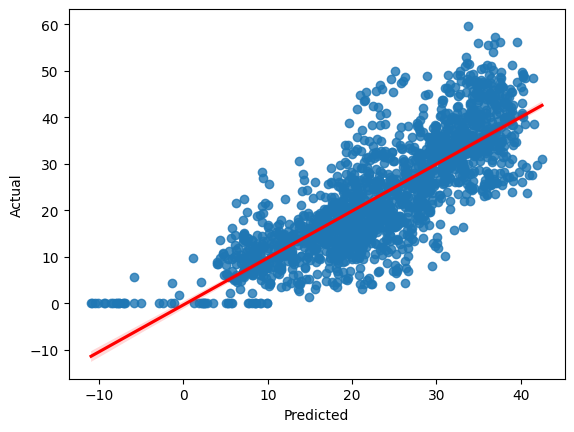

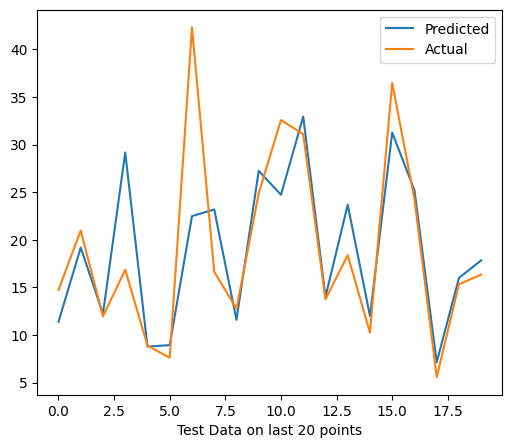

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.387089  19.184132  12.228819  29.166594  8.786037
error       3.343831   1.792045  -0.270558 -12.314295  0.102157
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(Lasso(alpha=0.1, max_iter=1000), 'Lasso')

##7.3 Ridge

Ridge Regression, a form of regularized linear regression, addresses multicollinearity and overfitting by introducing a penalty term to the loss function. This penalty term is the L2 regularization, also called the weight decay term, which imposes a penalty based on the square of the coefficient magnitudes.

*   Ridge Regression is a valuable technique in linear regression to combat multicollinearity, where predictor variables are highly correlated, and overfitting, where the model captures noise in the data.
*   The L2 regularization term in Ridge Regression encourages the model to have smaller but non-zero coefficients for all features, unlike Lasso, which can drive some coefficients to exactly zero.
*   By applying Ridge Regression, one can strike a balance between the fit of the model and its complexity, resulting in more stable and reliable predictions.

train MSE : 54.005
train RMSE : 7.349
train MAE : 5.63
train R2 : 0.654
train Adj R2 : 0.653
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 52.984
test RMSE : 7.279
test MAE : 5.6
test R2 : 0.649
test Adj R2 : 0.646
------------------------------------------------------------------------------------------------------------------------------------------------------


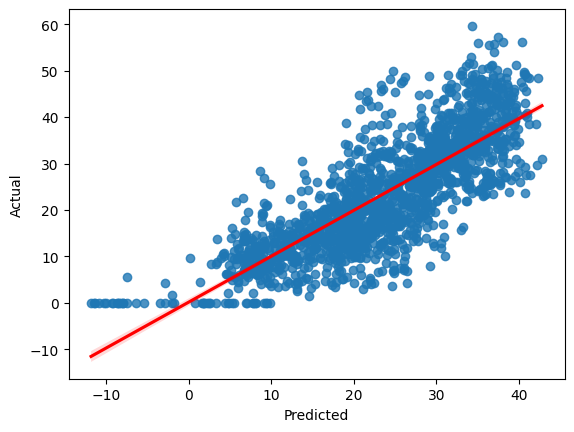

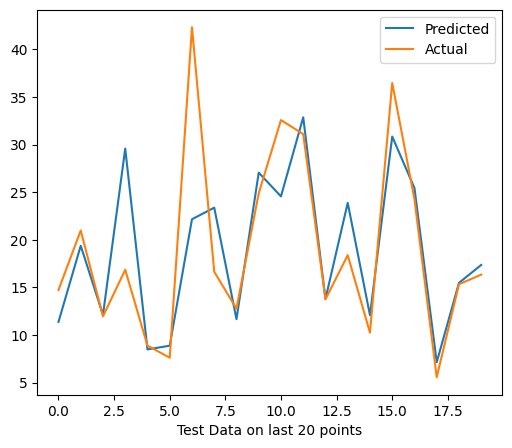

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.375985  19.371496  12.108418  29.577776  8.486471
error       3.354935   1.604681  -0.150158 -12.725477  0.401723
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(Ridge(alpha=0.1, max_iter=1000), 'Ridge')

##7.4 Elastic Net

ElasticNet, a linear regression method, harnesses the strengths of both L1 (Lasso) and L2 (Ridge) regularization techniques. These regularization methods prevent overfitting by introducing penalty terms into the loss function the model seeks to minimize. Lasso penalizes coefficients based on their absolute values, while Ridge penalizes coefficients based on their squares.
*   ElasticNet offers a balanced approach by simultaneously applying L1 and L2 regularization. This helps in feature selection and reduces multicollinearity, enhancing the model's generalization capability.
*   Lasso tends to force some coefficients to zero, effectively performing feature selection, while Ridge keeps all features but with reduced influence, allowing ElasticNet to inherit these characteristics.
*   ElasticNet is a versatile tool for tackling complex datasets where both feature selection and regularization are necessary.

train MSE : 54.463
train RMSE : 7.38
train MAE : 5.663
train R2 : 0.651
train Adj R2 : 0.65
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.814
test RMSE : 7.336
test MAE : 5.661
test R2 : 0.643
test Adj R2 : 0.64
------------------------------------------------------------------------------------------------------------------------------------------------------


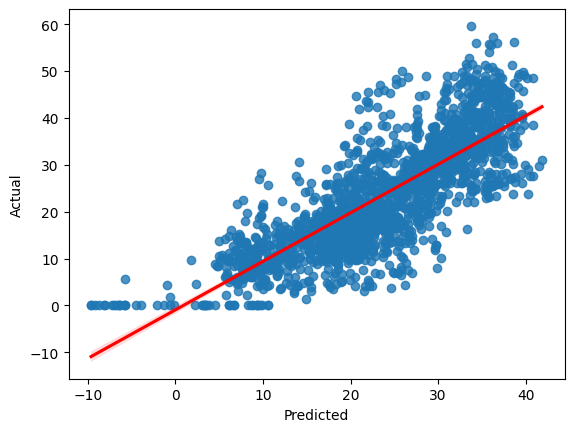

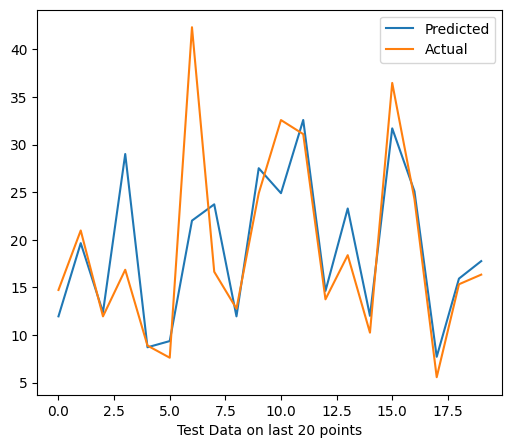

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.961095  19.647477  12.388840  29.006202  8.710924
error       2.769825   1.328700  -0.430579 -12.153902  0.177271
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(ElasticNet(alpha=0.1, max_iter=1000), 'Elastic Net')

##7.5 K-Nearest Neighbors

K-nearest neighbor (KNN) is a supervised machine learning algorithm employed for both classification and regression tasks. KNN is a non-parametric method, which means it doesn't rely on underlying data assumptions. It categorizes an input dataset by finding the most similar data points from its neighbors. The measure of similarity is determined by various distance metrics, including Euclidean Distance, Manhattan Distance, Minkowski, and Cosine Similarity Measure.
*   KNN makes predictions based on the majority class of its K-nearest neighbors in classification and the average of their values in regression.
*   It's a versatile algorithm suitable for a wide range of data types and can adapt to various distance metrics.
*   The choice of K (the number of neighbors to consider) and the distance metric significantly impact the algorithm's performance and should be carefully selected based on the dataset and problem.

train MSE : 12.741
train RMSE : 3.569
train MAE : 2.354
train R2 : 0.918
train Adj R2 : 0.918
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 25.729
test RMSE : 5.072
test MAE : 3.536
test R2 : 0.829
test Adj R2 : 0.828
------------------------------------------------------------------------------------------------------------------------------------------------------


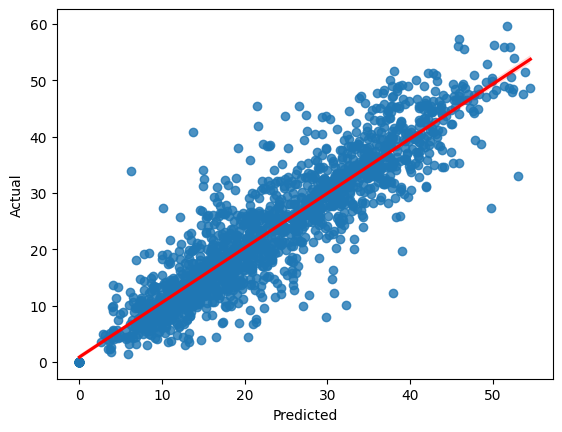

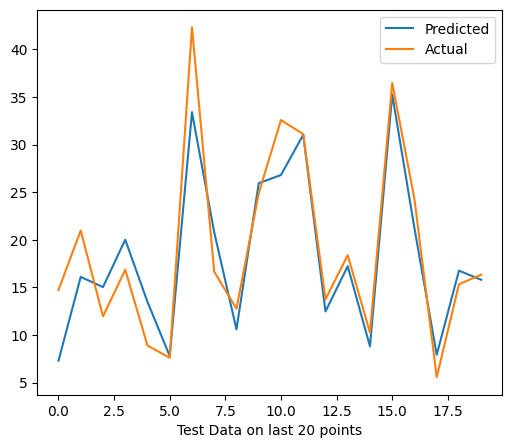

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813       1708
y_actual   14.730920  20.976177  11.958261  16.852300   8.888194
y_predict   7.304707  16.104447  15.030598  20.009112  13.478800
error       7.426213   4.871730  -3.072338  -3.156813  -4.590605
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(KNeighborsRegressor(n_neighbors=3),'KNN')

##7.6 Support Vector Machine

The Support Vector Machine (SVM) is a robust machine learning algorithm used for both classification and regression tasks. Its fundamental idea involves identifying the optimal hyperplane that effectively separates classes in classification problems or predicts target values in regression.
*   SVM is known for its effectiveness in handling high-dimensional data, as it can find complex decision boundaries.
*   The choice of the kernel function (e.g., 'rbf' for Radial Basis Function) significantly impacts SVM's performance.
*   The regularization parameter (C) influences the trade-off between maximizing the margin and minimizing classification errors in SVM.
*   SVM's ability to handle both linear and non-linear data makes it a versatile choice for various machine learning applications.

train MSE : 20.748
train RMSE : 4.555
train MAE : 2.703
train R2 : 0.867
train Adj R2 : 0.867
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 25.763
test RMSE : 5.076
test MAE : 3.313
test R2 : 0.829
test Adj R2 : 0.828
------------------------------------------------------------------------------------------------------------------------------------------------------


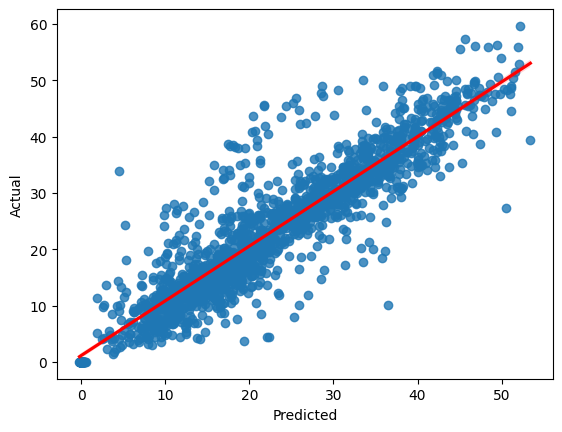

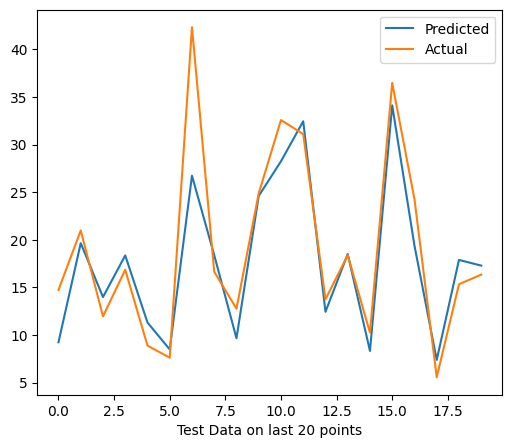

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813       1708
y_actual   14.730920  20.976177  11.958261  16.852300   8.888194
y_predict   9.236638  19.643827  13.985499  18.355363  11.313747
error       5.494281   1.332350  -2.027239  -1.503063  -2.425553
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(SVR(kernel='rbf',C=100), 'SVM')

##7.7 Decision Tree

A decision tree is a fundamental machine learning model used for prediction and decision-making. It operates by recursively applying rules and conditions to input features, breaking down complex data into smaller, more manageable segments.
*   Each node in the tree represents a feature test, while branches depict the outcomes of these tests.
*   The leaves, located at the end of the branches, contain the final class predictions or decisions.
*   Decision tree construction involves selecting the best features to split data, optimizing criteria like information gain or impurity reduction.
*   In the given example, the DecisionTreeRegressor is customized with parameters like minimum samples per leaf, minimum samples for splitting, maximum depth, and random state, allowing users to fine-tune the model for specific needs.

train MSE : 13.812
train RMSE : 3.716
train MAE : 2.549
train R2 : 0.911
train Adj R2 : 0.911
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 21.06
test RMSE : 4.589
test MAE : 3.173
test R2 : 0.86
test Adj R2 : 0.859
------------------------------------------------------------------------------------------------------------------------------------------------------


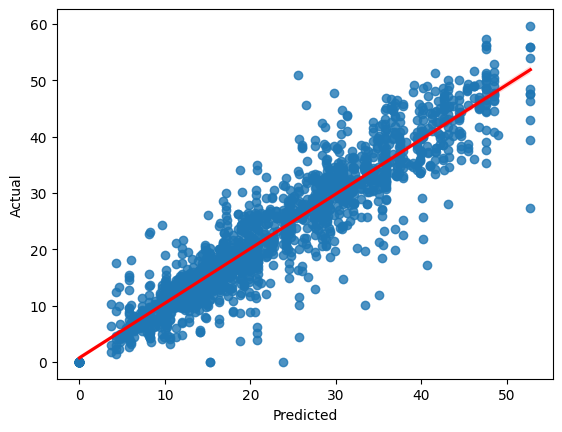

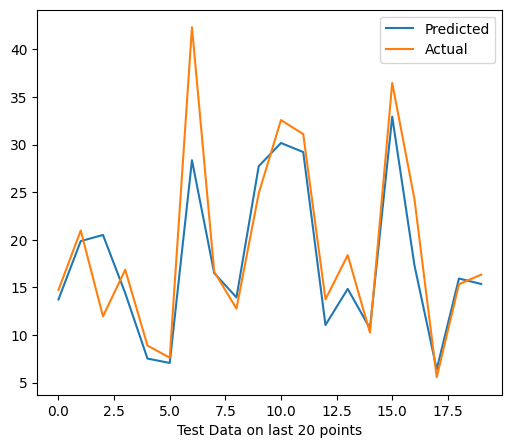

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  13.735636  19.861162  20.506372  14.395132  7.527184
error       0.995284   1.115015  -8.548111   2.457168  1.361011
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(DecisionTreeRegressor(min_samples_leaf=15, min_samples_split=3,max_depth=15, random_state=40), 'Decision Tree')

##7.8 Random Forest

Random Forest, an ensemble learning algorithm, stands out by constructing numerous decision trees and aggregating their outputs to arrive at a final prediction. It's a departure from single decision trees, as it mitigates the risk of overfitting by blending the outcomes of multiple trees, each trained on a distinct subset of the data.
*   Ensemble approach: Random Forest leverages the wisdom of many trees, drawing on their collective insights.
*   Overfitting prevention: By using diverse data subsets and combining results, it reduces the likelihood of overfitting, where a model fits the training data too closely and performs poorly on new data.
*   Robust and versatile: This method is widely appreciated for its robustness, ability to handle high-dimensional data, and suitability for both classification and regression tasks.

**Hyperparameter Tunning using GridSearchCV**

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 80],
    'max_depth': [15, 20],
    'min_samples_split': [5, 15],
    'min_samples_leaf': [3, 5]
}

# Create a RandomForestRegressor model
rf = RandomForestRegressor()

# Initialize GridSearchCV with cross-validation (cv=5) and R-squared scoring
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X, y)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 15],
                         'n_estimators': [50, 80]},
             scoring='r2')

In [ ]:
# Get the best parameters from the grid search
rf_optimal_model = grid_search.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=15,
                      n_estimators=50)

train MSE : 7.716
train RMSE : 2.778
train MAE : 1.836
train R2 : 0.951
train Adj R2 : 0.95
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 14.727
test RMSE : 3.838
test MAE : 2.634
test R2 : 0.902
test Adj R2 : 0.901
------------------------------------------------------------------------------------------------------------------------------------------------------


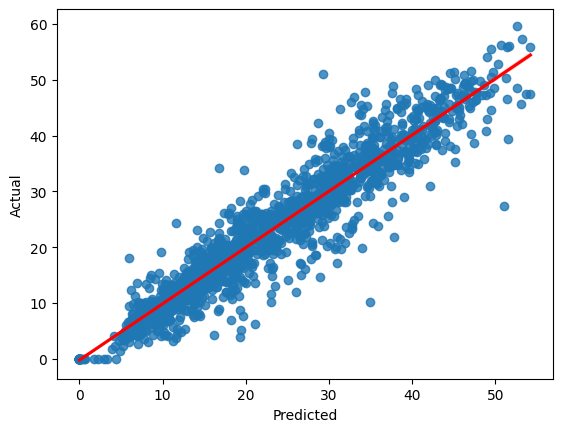

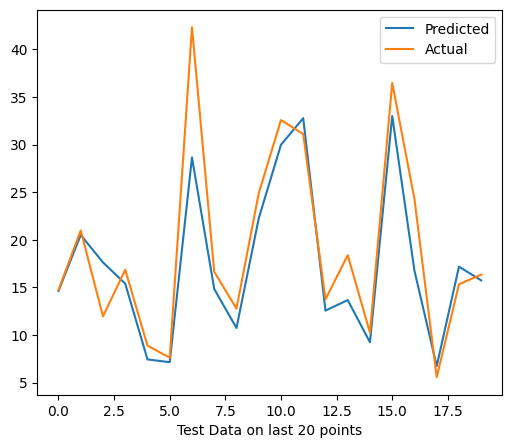

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  14.634754  20.508951  17.622172  15.394343  7.438399
error       0.096166   0.467226  -5.663912   1.457956  1.449795
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(rf_optimal_model, 'Random Forest')

##Model Explainability

In [ ]:
# Get feature importances from the optimal Random Forest model
importances = rf_optimal_model.feature_importances_

# Create a DataFrame to store feature names and their importance values
importance_df = pd.DataFrame({'Feature': X.columns, 'Feature Importance': importances})

# Sort the DataFrame by feature importance in descending order
sorting_features = importance_df.sort_values(by='Feature Importance', ascending=False)
sorting_features

Feature  Feature Importance
1       temperature            0.276876
0              hour            0.256287
9   functioning_day            0.177924
6          rainfall            0.082352
2          humidity            0.072919
15   seasons_Winter            0.047078
5   solar_radiation            0.030560
10            month            0.018352
11              day            0.010642
4        visibility            0.007967
12   seasons_Autumn            0.006967
3        wind_speed            0.006357
13   seasons_Spring            0.001773
7          snowfall            0.001618
8           holiday            0.001340
14   seasons_Summer            0.000987

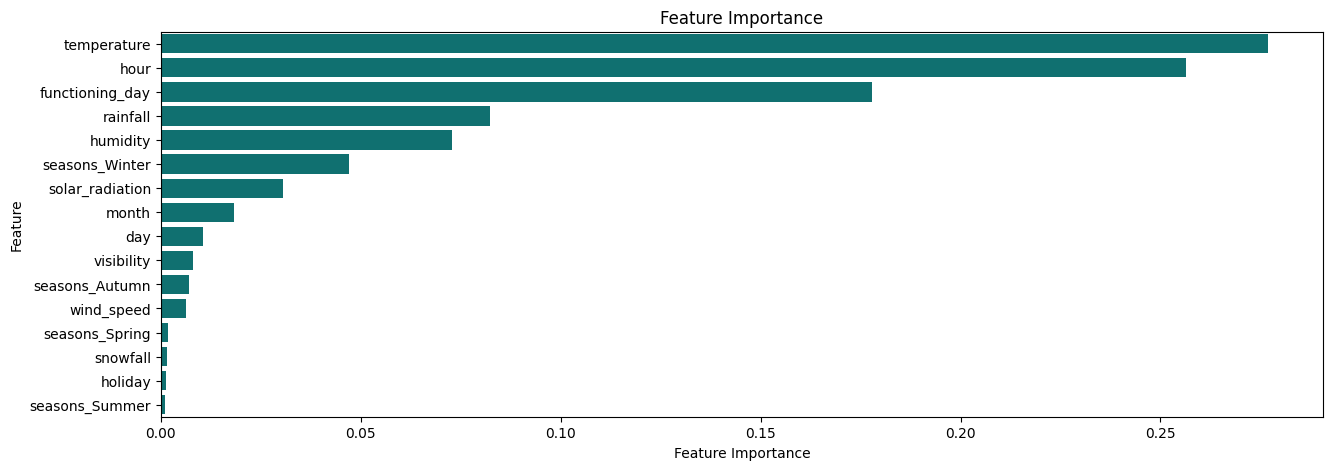

In [ ]:
# Plot the feature importance graph
plt.figure(figsize=(15, 5))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='teal')
plt.title('Feature Importance')
plt.show()


In the Random Forest model, the top 5 influential features are temperature, hour, functioning_day, rainfall, and humidity. These variables play a significant role in determining the predictions made by the model and are considered the most important factors in the analysis.

##7.9 Light GBM

LightGBM is an open-source gradient boosting framework created by Microsoft. It stands out for its efficiency, making it an ideal choice for dealing with large datasets. This framework is particularly well-suited for tasks that require high-performance machine learning.

A key distinguishing feature of LightGBM is its innovative use of a histogram-based approach for splitting nodes in decision trees. This technique results in faster and more memory-efficient training of decision trees compared to traditional gradient boosting algorithms, such as those used in libraries like XGBoost.

In summary, LightGBM offers a highly efficient and scalable solution for gradient boosting, thanks to its histogram-based node splitting and optimization techniques. This makes it a valuable tool for tackling large-scale machine learning problems.

HyperParameter Tunning using GridSearchCV

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [600, 800],            # Number of trees in the ensemble
    'max_depth': [8, 10],                # Maximum depth of each tree
    'min_samples_split': [3, 5],         # Minimum samples required to split a node
    'min_samples_leaf': [2, 3]           # Minimum samples in a leaf node
}

# Initialize the LightGBM Regressor model
xgb = XGBRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
# Here, cv=5 specifies 5-fold cross-validation, and scoring='r2' uses R-squared for evaluation
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X, y)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [8, 10], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 5],
                         'n_estimators': [600, 800]},
             scoring='r2')

In [ ]:
# Get the best parameters from the grid search
lgb_optimal_model = grid_search.best_estimator_
lgb_optimal_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, min_samples_leaf=2, min_samples_split=3,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=600, n_jobs=None, ...)

train MSE : 0.0
train RMSE : 0.0
train MAE : 0.002
train R2 : 1.0
train Adj R2 : 1.0
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 11.728
test RMSE : 3.425
test MAE : 2.235
test R2 : 0.922
test Adj R2 : 0.922
------------------------------------------------------------------------------------------------------------------------------------------------------


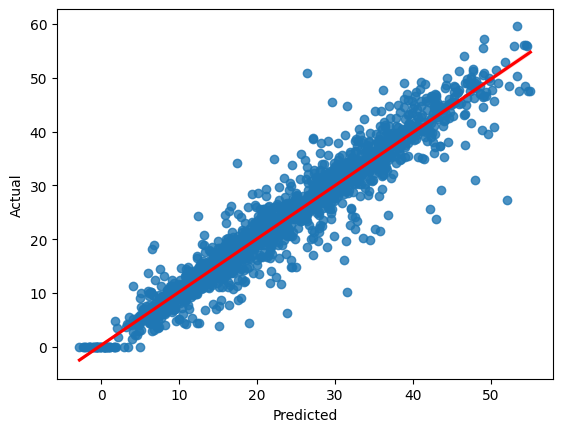

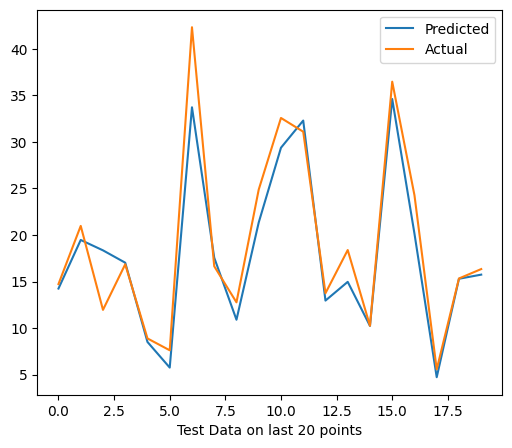

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  14.247567  19.466471  18.350901  17.024603  8.509638
error       0.483353   1.509706  -6.392640  -0.172303  0.378557
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Assuming xgb_optimal_model is a trained LightGBM model
predict(lgb_optimal_model, 'LGB')

##Model Explainability

In [ ]:
# feature importance
importances = lgb_optimal_model.feature_importances_

#Creating a dictonary
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
9   functioning_day            0.467409
15   seasons_Winter            0.405057
6          rainfall            0.080627
0              hour            0.010394
1       temperature            0.009814
8           holiday            0.006987
10            month            0.005027
2          humidity            0.003186
5   solar_radiation            0.002679
7          snowfall            0.002579
14   seasons_Summer            0.001928
12   seasons_Autumn            0.001480
11              day            0.001247
4        visibility            0.000661
3        wind_speed            0.000564
13   seasons_Spring            0.000361

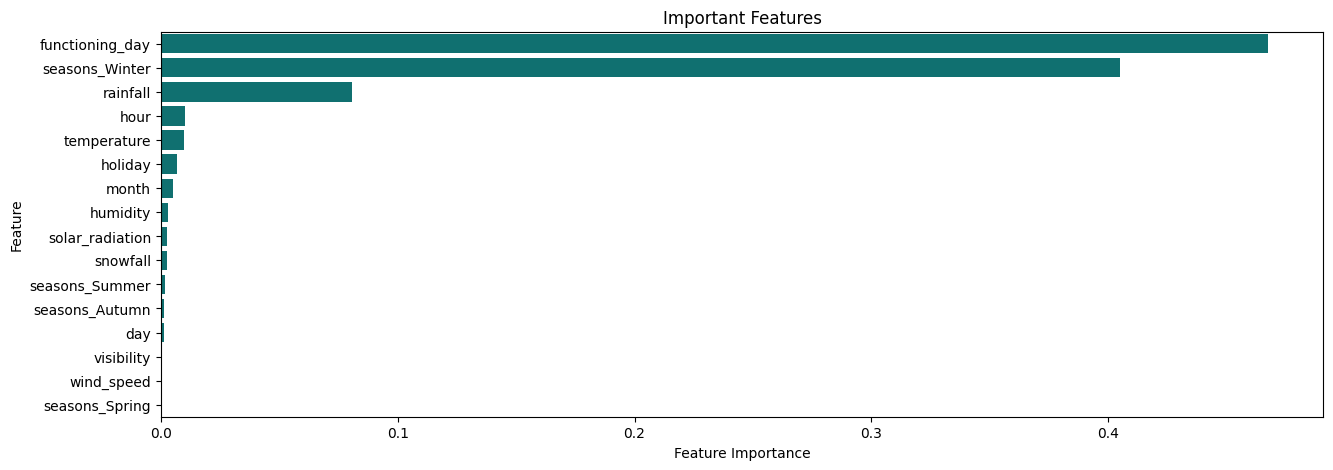

In [ ]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar=sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='teal')
bar.set_title('Important Features')
plt.show()

In the XGBoost (Extreme Gradient Boosting) model, the top 5 important features, in order of importance, are:

*   Temperature: This feature has the highest importance in making predictions. It indicates that temperature plays a significant role in the model's decision-making process.
*   Humidity: Humidity is the second most important feature. It suggests that the level of humidity in the environment has a strong influence on the model's predictions.
*   Visibility: Visibility is the third most important feature. It implies that the extent to which objects are visible in the environment is a key factor in the model's decision-making.
*   Hour: The hour of the day is the fourth most important feature. This indicates that time of day plays a role in the model's predictions, which is common in time series or temporal data.
*   Day: The day of the week or month is the fifth most important feature. It suggests that the specific day can impact the model's predictions, which is relevant in scenarios where daily or monthly patterns are important.

In summary, these features have been identified as the most influential in the XGBoost model, with temperature, humidity, visibility, hour, and day being the top factors contributing to its predictive accuracy.

##7.10 Model Result

The model's goodness of fit can be assessed using the R-squared measure, which quantifies the relationship between dependent and independent variables. However, R-squared does not address overfitting concerns. In cases where regression models have numerous independent variables, they might perform well during training but poorly during testing due to excessive complexity. Adjusted R-squared is a valuable metric that not only considers the relationships between variables but also penalizes the addition of unnecessary independent variables, mitigating overfitting risks.

R-squared remains a reliable method for understanding the rented_bike_count's predictability, as it captures the link between this variable and the independent ones.

In [ ]:
# converting the model_result list into DataFrame
model_result = pd.DataFrame(model_result)

# sorting the values by test R2 score
model_result.sort_values(by='test R2', ascending=False)

model  train MSE  test MSE  train RMSE  test RMSE  train MAE  \
8               LGB      0.000    11.728       0.000      3.425      0.002   
7     Random Forest      7.716    14.727       2.778      3.838      1.836   
6     Decision Tree     13.812    21.060       3.716      4.589      2.549   
5               SVM     20.748    25.763       4.555      5.076      2.703   
4               KNN     12.741    25.729       3.569      5.072      2.354   
0  LinearRegression     54.005    52.984       7.349      7.279      5.630   
2             Ridge     54.005    52.984       7.349      7.279      5.630   
1             Lasso     54.160    53.257       7.359      7.298      5.638   
3       Elastic Net     54.463    53.814       7.380      7.336      5.663   

   test MAE  train R2  test R2  train Adj R2  test Adj R2  
8     2.235     1.000    0.922         1.000        0.922  
7     2.634     0.951    0.902         0.950        0.901  
6     3.173     0.911    0.860         0.911        0.859  
5     3.313     0.867    0.829         0.867        0.828  
4     3.536     0.918    0.829         0.918        0.828  
0     5.600     0.654    0.649         0.653        0.646  
2     5.600     0.654    0.649         0.653        0.646  
1     5.619     0.653    0.647         0.652        0.644  
3     5.661     0.651    0.643         0.650        0.640

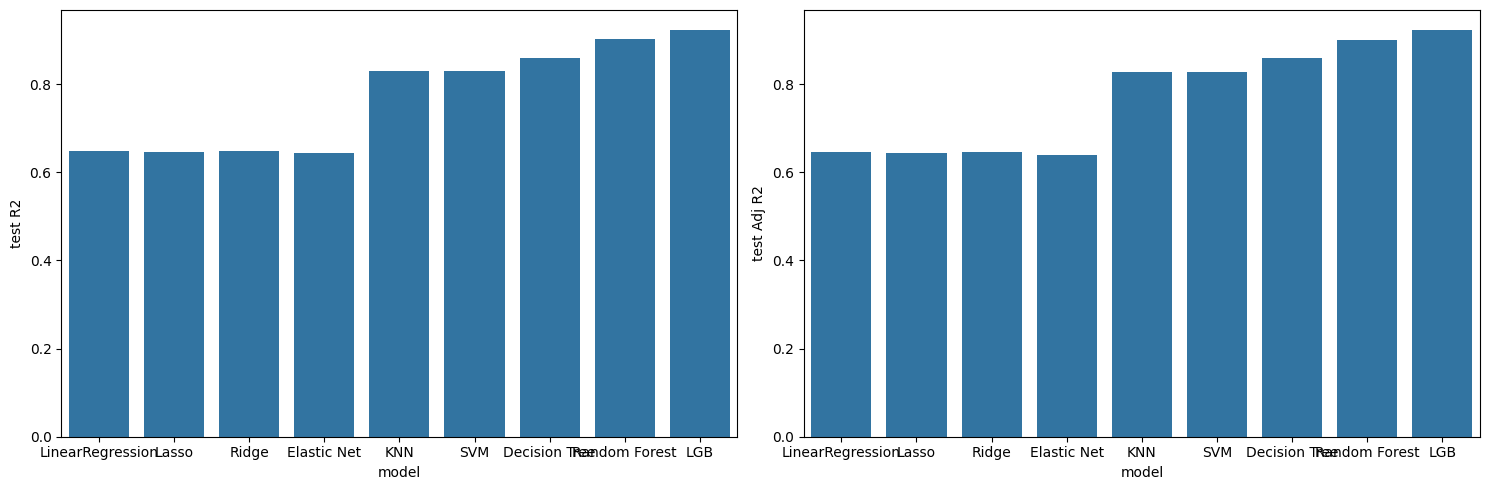

In [ ]:
# plotting graph to compare model performance of all the models
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test R2'], ax=ax[0])           # Model Vs test R2
sns.barplot(x=model_result['model'], y=model_result['test Adj R2'], ax=ax[1])       # Model Vs test Adj R2
plt.tight_layout()

The analysis suggests that either XGB or LGB Regressor can serve as the final model. These models exhibit the lowest RMSE values and the highest R2 scores on the test data. Opting for LGB is favored due to its reputation for excelling with large datasets and its ability to provide a more insightful interpretation of the features it considers.

##Conclusion

In this project, we addressed a critical regression problem, predicting bike sharing counts, which plays a pivotal role in enhancing urban mobility and public convenience. The increasing popularity of bike rentals emphasizes the need for timely and abundant access to rental bikes to minimize wait times, making the availability of bikes a key factor.

Our journey commenced with a comprehensive exploratory data analysis (EDA). We scrutinized the dependent variable, "Rental Bike Count," delving into both categorical and numerical variables. Through this analysis, we uncovered their correlations, distributions, and connections with the dependent variable. We also performed categorical variable one-hot encoding and judiciously removed numerical features with multicollinearity, which were primarily used for EDA purposes. Subsequently, we ventured into the realm of various models, ranging from elementary Linear Regression and Regularization Models like Ridge, Lasso, and Elastic Net to more sophisticated ensemble models, including Random Forest, Gradient Boosting, and Light GBM. Our journey culminated in model hyperparameter tuning to enhance predictive performance.

Notably, our analysis unveiled the patterns and insights crucial for efficient bike sharing demand management. It was evident that the majority of rentals are attributed to daily commutes to workplaces and educational institutions, with peak rental hours observed during the morning and evening rush, from 7–9 am and 5–6 pm. We discerned two distinct rental patterns based on working and non-working days, reflecting the peaks during office hours and a more consistent demand with a noon peak, respectively. The hour of the day emerged as a significant driver of bike rental counts, aligning with the daily routines of users.

Moreover, temperature was a vital factor influencing rental counts, with the highest demand observed between 32 to 36 degrees Celsius. Seasonal trends were evident, with Spring and Summer recording the highest rentals, while Winter witnessed lower counts. Unsurprisingly, weather conditions played a key role, with clear days attracting the highest number of rentals, while snowy or rainy days witnessed reduced demand. Lastly, we noted that increasing humidity correlated with decreased bike rental counts.

Ultimately, our model selection favored the Light GBM, prioritizing predictive accuracy. We rigorously tested and compared various models, including linear models, decision trees, Random Forests, and Gradient Boosting. The choice was informed by the performance metric R2. While our training R2 score indicated a remarkable 99%, the test R2 score, due to the dataset's limited size, reached 92.5%. We anticipate that with more data, our algorithm can be retrained to further improve its predictive prowess.